In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv')

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
df.duplicated().sum() 

24

In [6]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [7]:
df=df.replace(' ?',np.NaN)

In [8]:
df.isin([' ','NA','-']).sum().any()

False

In [9]:
df.drop_duplicates(keep='last', inplace=True)

<Axes: >

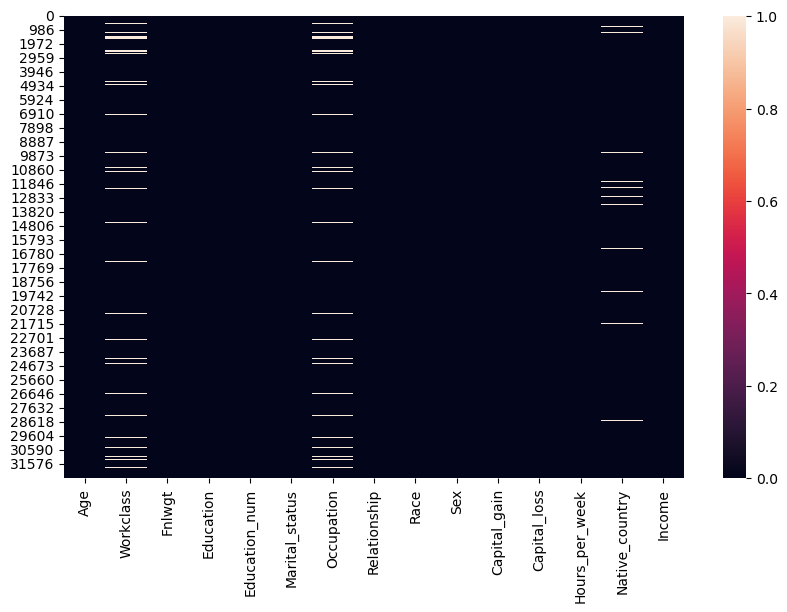

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [11]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))


                Missing Values  % Missing data
Occupation                1843        5.664495
Workclass                 1836        5.642980
Native_country             582        1.788788
Age                          0        0.000000
Fnlwgt                       0        0.000000
Education                    0        0.000000
Education_num                0        0.000000
Marital_status               0        0.000000
Relationship                 0        0.000000
Race                         0        0.000000
Sex                          0        0.000000
Capital_gain                 0        0.000000
Capital_loss                 0        0.000000
Hours_per_week               0        0.000000
Income                       0        0.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       30700 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      30693 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  31954 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [13]:
# Separating numerical and categorical variable
Numerical=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
Category=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']


In [14]:
# Imputating Missing value with mode for categorical features
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)

In [15]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))


                Missing Values  % Missing data
Age                          0             0.0
Workclass                    0             0.0
Fnlwgt                       0             0.0
Education                    0             0.0
Education_num                0             0.0
Marital_status               0             0.0
Occupation                   0             0.0
Relationship                 0             0.0
Race                         0             0.0
Sex                          0             0.0
Capital_gain                 0             0.0
Capital_loss                 0             0.0
Hours_per_week               0             0.0
Native_country               0             0.0
Income                       0             0.0


<Axes: >

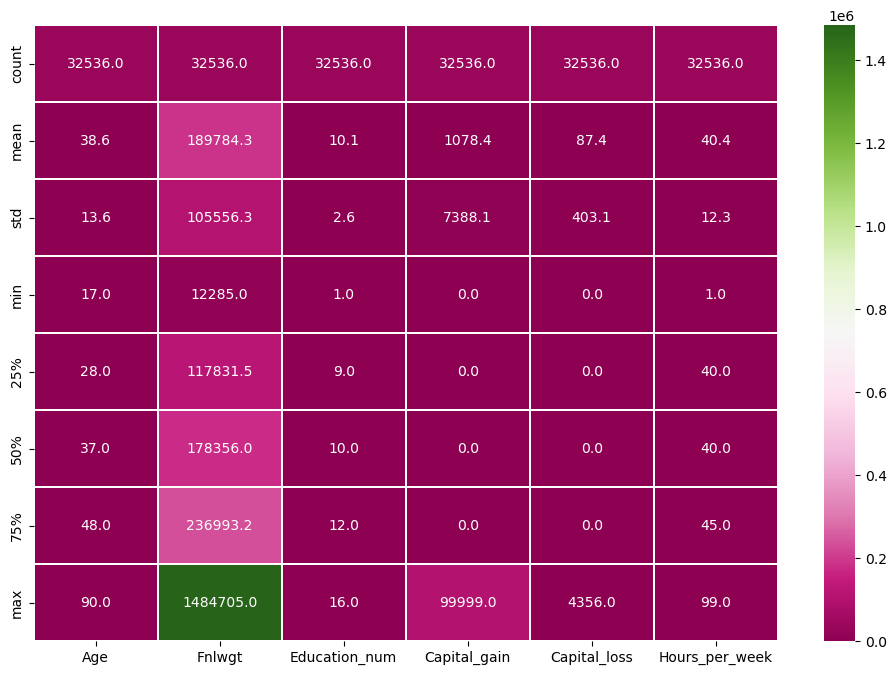

In [16]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32536.0,38.585536,13.638193,17.0,28.0,37.0,48.00,90.0
Fnlwgt,32536.0,189784.298992,105556.258211,12285.0,117831.5,178356.0,236993.25,1484705.0
Education_num,32536.0,10.081725,2.571622,1.0,9.0,10.0,12.00,16.0
Capital_gain,32536.0,1078.410069,7388.068465,0.0,0.0,0.0,0.00,99999.0
Capital_loss,32536.0,87.370912,403.107737,0.0,0.0,0.0,0.00,4356.0
Hours_per_week,32536.0,40.440343,12.347079,1.0,40.0,40.0,45.00,99.0


In [18]:
for i in Category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Workclass
Workclass
 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
Education
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: count, dtype: int64
Marital_status
Marital_status
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64
Occupation
Occupation
 Prof-specialty       

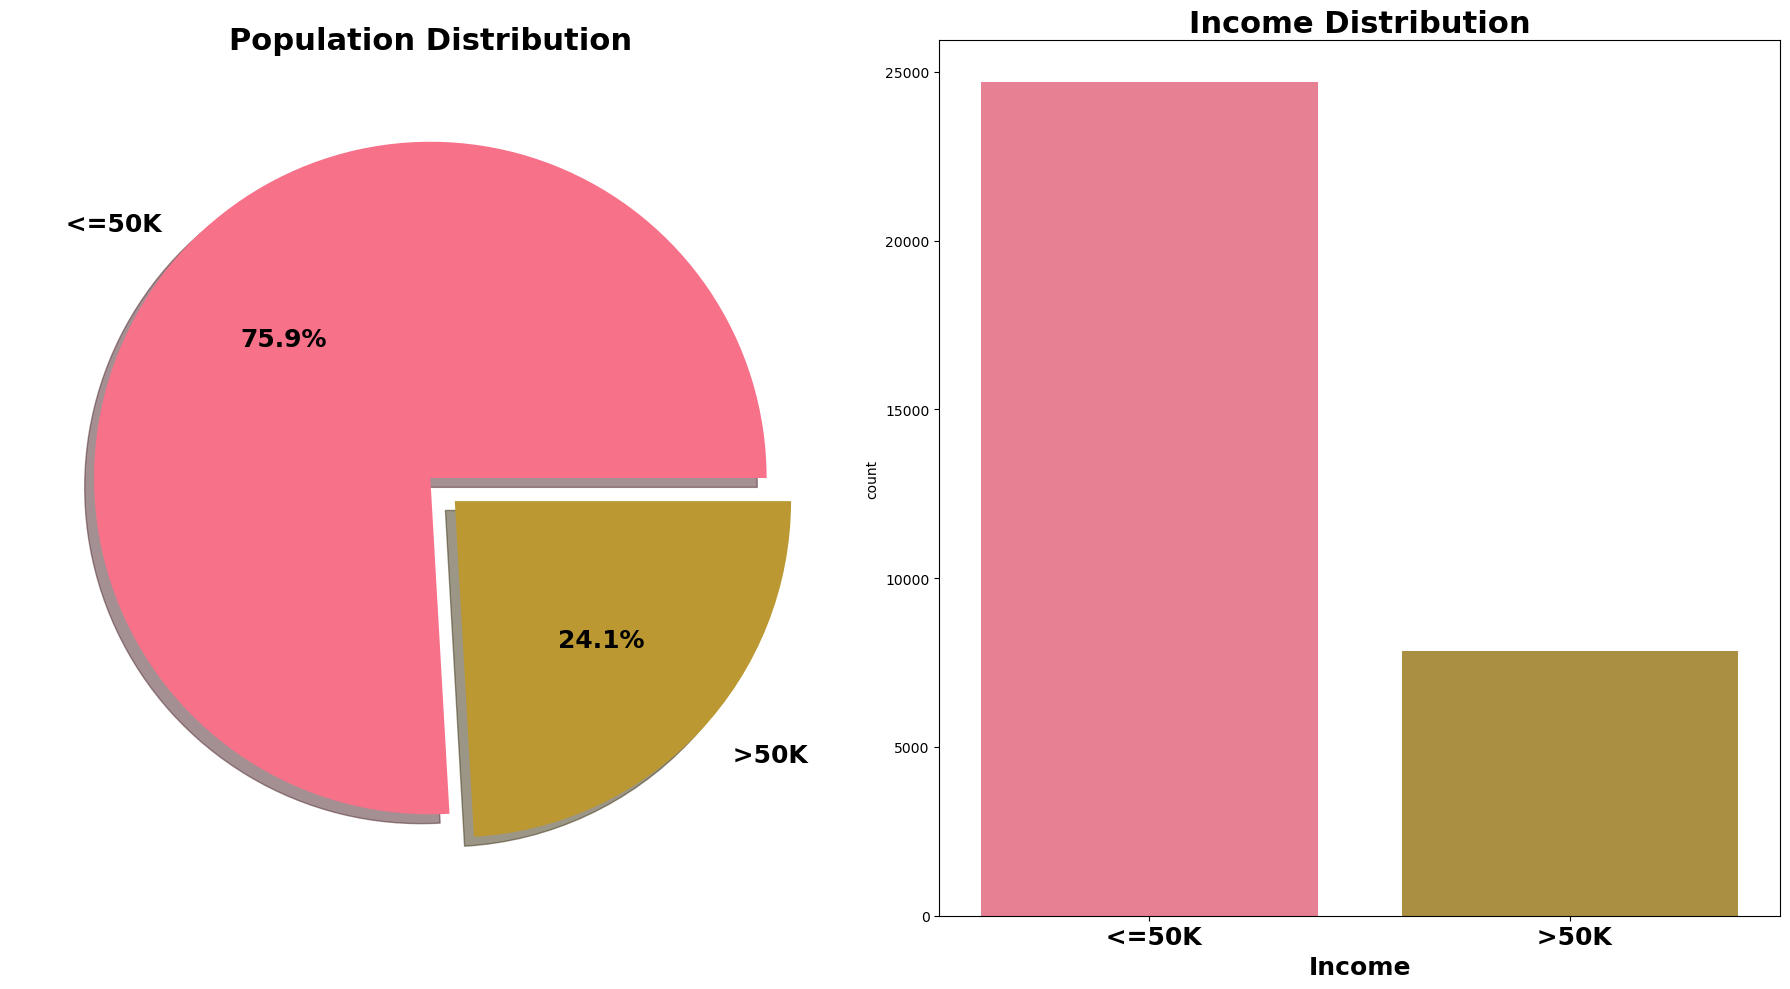

In [19]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,10))
df['Income'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Population Distribution', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Income', data=df, ax=ax[1])
ax[1].set_title('Income Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Income",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()


In [20]:
print('Minimum Age:', df['Age'].min(),'years')
print('Maximum Age:', df['Age'].max(),'years')
print('Average Age:', df['Age'].mean(),'years')



Minimum Age: 17 years
Maximum Age: 90 years
Average Age: 38.58553602163757 years


In [21]:
# Defining function to create new columns to classify people according different age gruop
def age_group(x):
    x = int(x)
    x = abs(x)
    if (18 < x < 31):
        return "19-30"
    if (30 < x < 41) :
        return '31-40'
    if (40 < x <51):
        return '41-50'
    if (50 < x < 61):
        return "51-60"
    if (60 < x < 71):
        return "61-70"
    else :
        return 'Greater Than 70'


In [22]:
df['age_group']=df['Age'].apply(age_group)


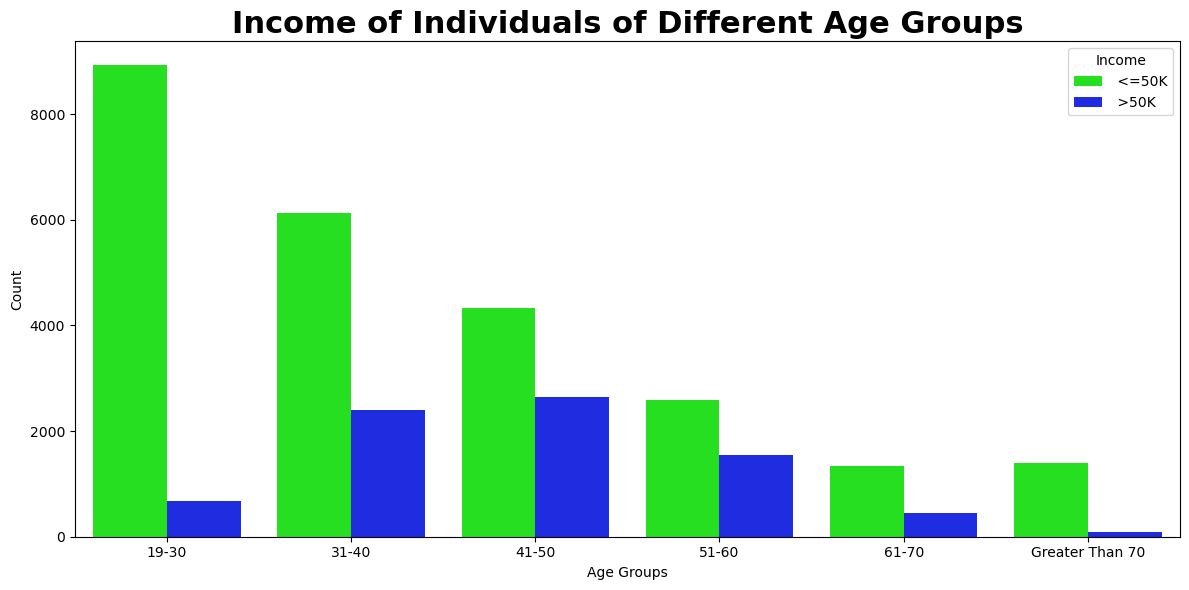

In [23]:
plt.figure(figsize=(12, 6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater Than 70']
p = sns.countplot(x='age_group', hue='Income', data=df, palette='hsv', order=order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=22, fontweight='bold')
p.set_xlabel('Age Groups')
p.set_ylabel('Count')
plt.show()

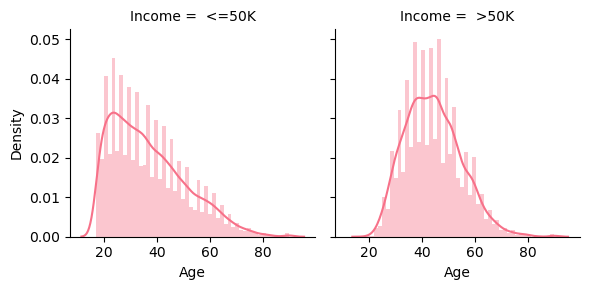

In [24]:
# Distribution of age with income categories
ax= sns.FacetGrid(df,col='Income')
ax.map(sns.distplot,'Age')
plt.show()

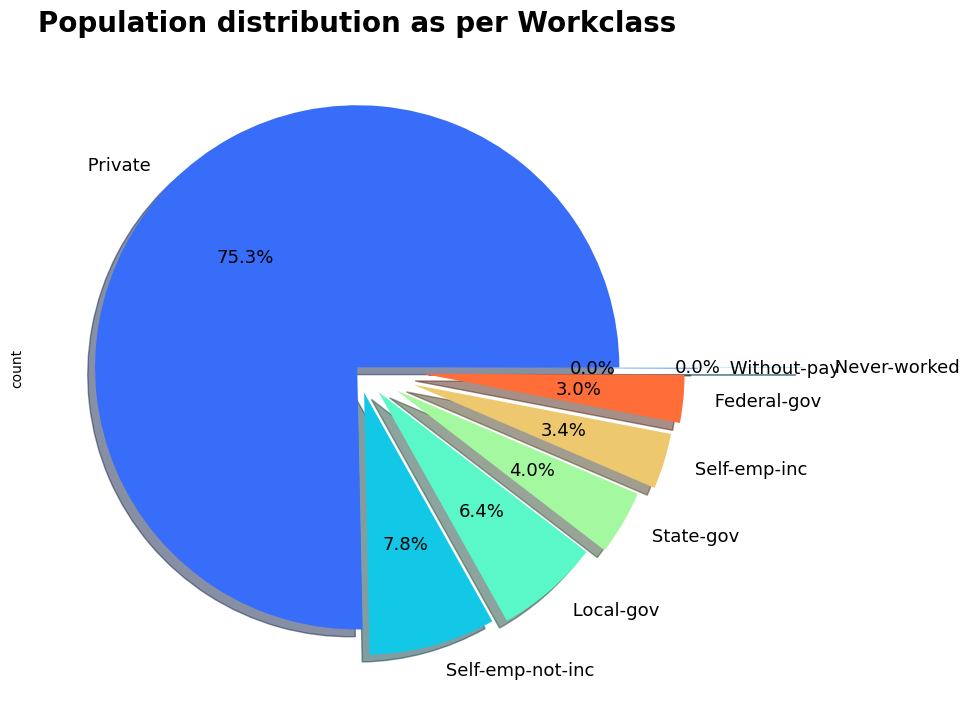

In [25]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['Workclass'].value_counts().plot.pie(explode=[0,0.1,0.125,0.175,0.225,0.25,0.3,0.7],autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13}, shadow=True)
plt.title('Population distribution as per Workclass', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()

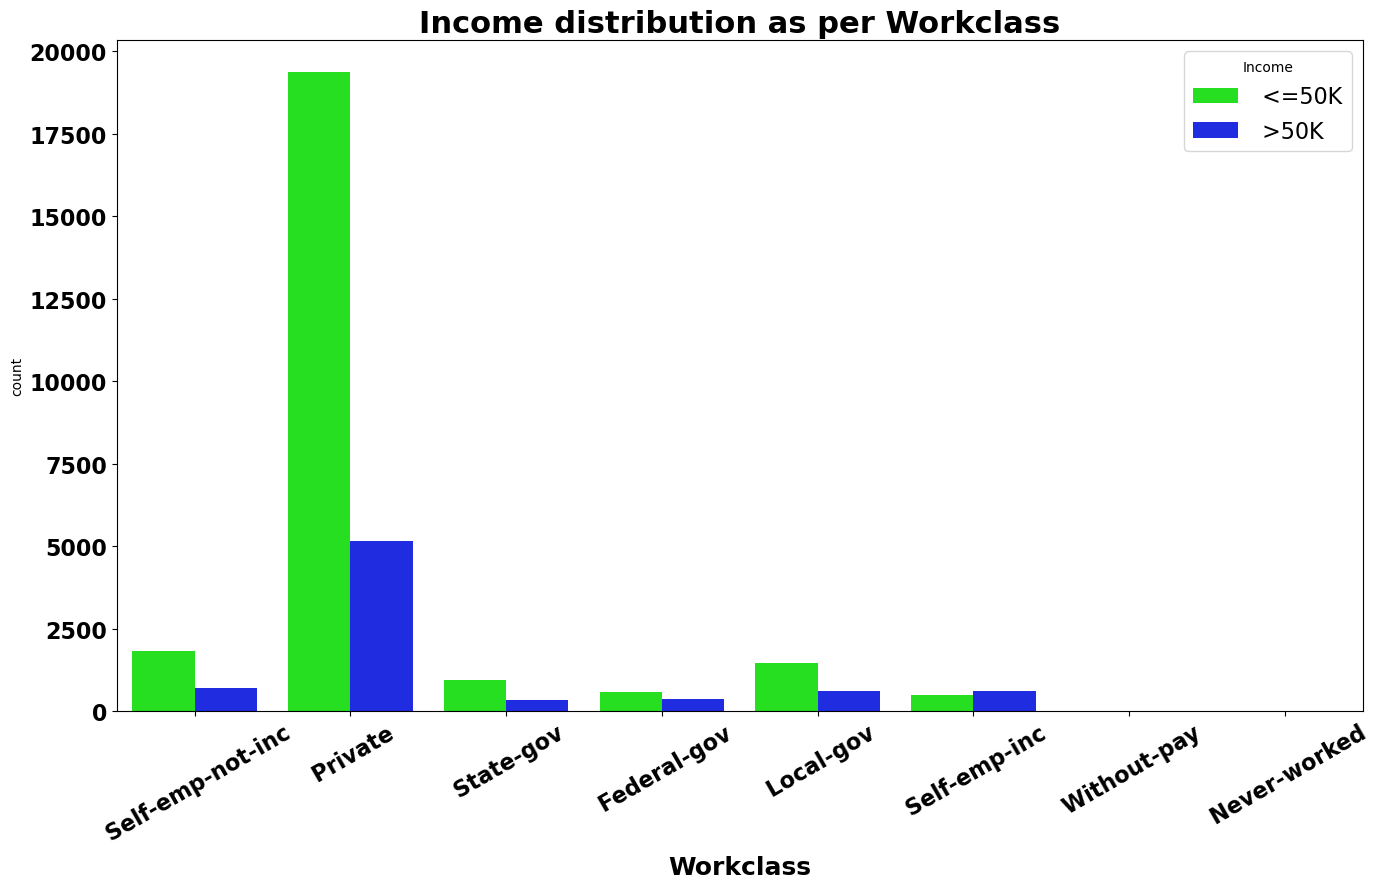

In [26]:
plt.figure(figsize=(14, 9))
p = sns.countplot(x='Workclass', hue='Income', data=df, palette='hsv')
plt.title('Income distribution as per Workclass', fontsize=22, fontweight='bold')
p.set_xlabel('Workclass', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold', rotation=30)
plt.yticks(fontsize=16, fontweight='bold')
plt.legend(title='Income', fontsize=16)
plt.show()

In [27]:
pd.crosstab(df['Income'],df["Workclass"], margins=True).style.background_gradient(cmap='summer_r')

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Income,,,,,,,,,
<=50K,589,1476,7,19357,494,1816,944,14,24697
>50K,371,617,0,5152,622,724,353,0,7839
All,960,2093,7,24509,1116,2540,1297,14,32536


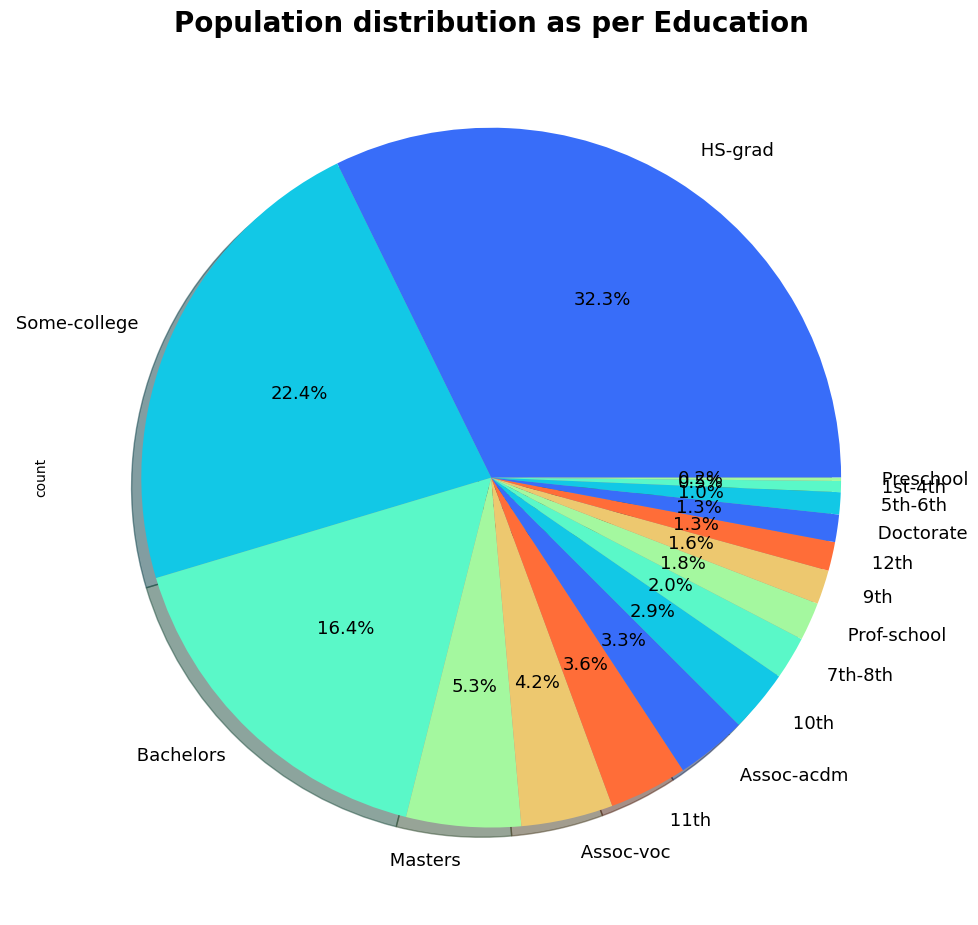

In [28]:
# Set autolayout to True
plt.rcParams["figure.autolayout"] = True

# Set the palette
sns.set_palette('rainbow')

# Create the figure
plt.figure(figsize=(10, 10))

# Plot the pie chart
df['Education'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize': 13}, shadow=True)

# Set the title
plt.title('Population distribution as per Education', fontsize=20, fontweight='bold')

# Show the plot
plt.show()

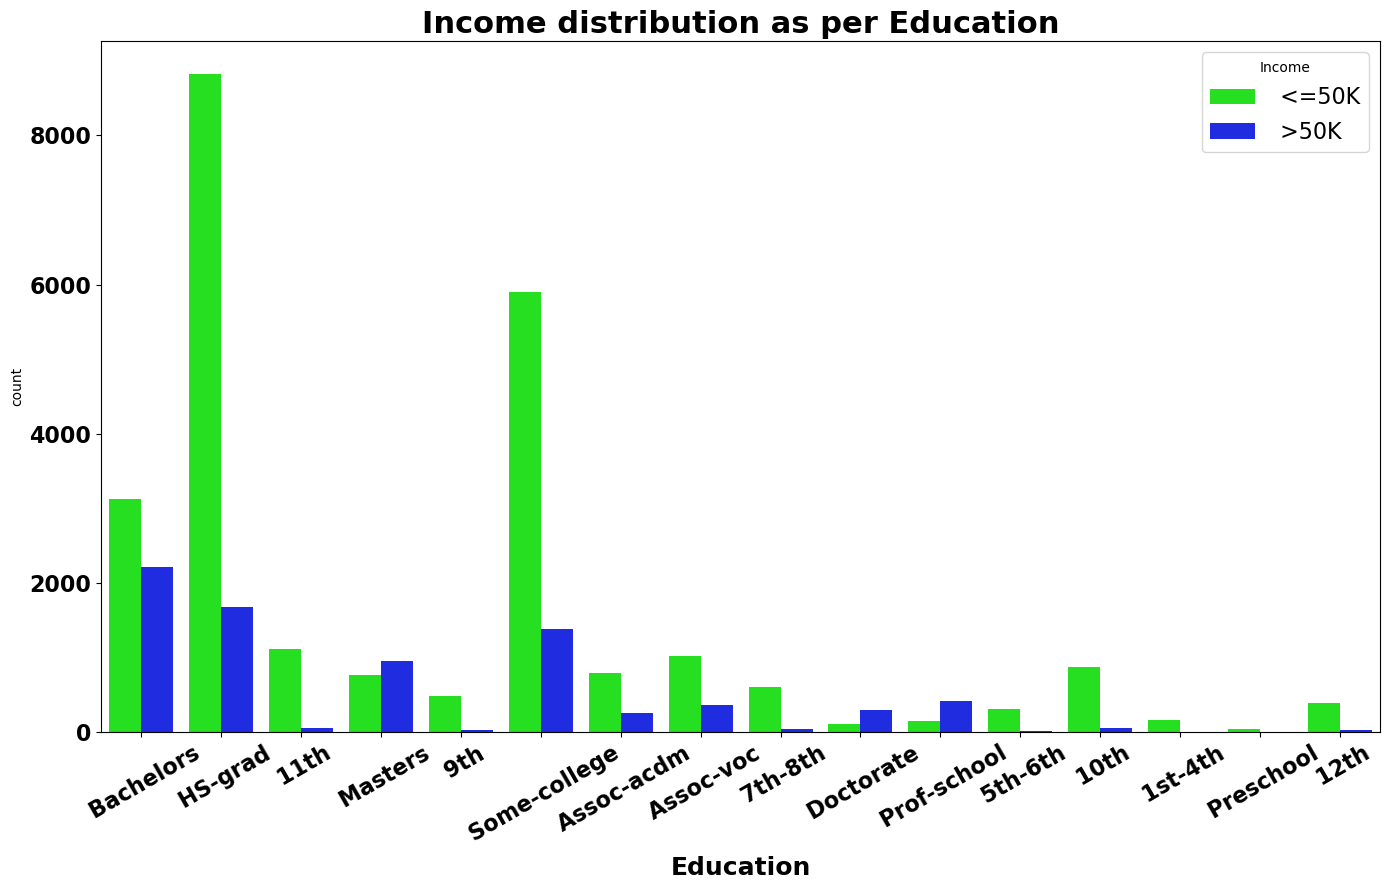

In [29]:
plt.figure(figsize=(14, 9))
p = sns.countplot(x='Education', hue='Income', data=df, palette='hsv')
plt.title('Income distribution as per Education', fontsize=22, fontweight='bold')
p.set_xlabel('Education', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold', rotation=30)
plt.yticks(fontsize=16, fontweight='bold')
plt.legend(title='Income', fontsize=16)
plt.show()

In [30]:
pd.crosstab(df['Education'],df["Workclass"], margins=True).style.background_gradient(cmap='summer_r')


Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Education,,,,,,,,,
10th,6,31,2,795,19,67,13,0,933
11th,9,36,1,1041,14,60,14,0,1175
12th,5,19,0,373,7,19,10,0,433
1st-4th,0,4,0,146,2,13,1,0,166
5th-6th,1,9,0,295,4,19,4,0,332
7th-8th,2,28,1,495,14,94,10,1,645
9th,3,23,0,438,10,34,6,0,514
Assoc-acdm,55,88,0,776,35,71,41,1,1067
Assoc-voc,38,86,0,1066,38,108,46,0,1382


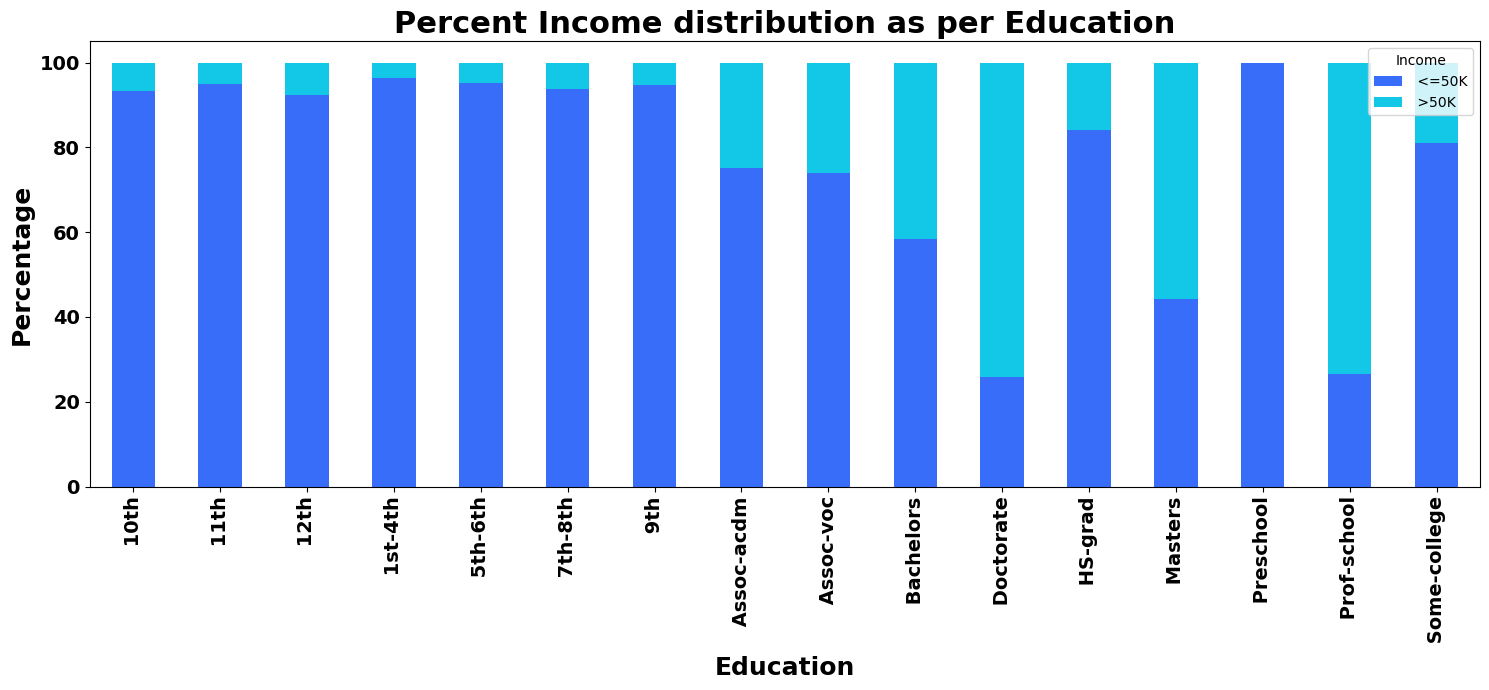

In [31]:
sns.set_palette('rainbow')

# Create a cross-tabulation of Education and Income
table = pd.crosstab(df['Education'], df['Income'])

# Calculate the percentage distribution and plot
percentage_distribution = (table.div(table.sum(axis=1), axis=0) * 100)
percentage_distribution.plot(kind='bar', stacked=True, figsize=(15, 7))

# Set the title and labels with appropriate font sizes and weights
plt.title('Percent Income distribution as per Education', fontsize=22, fontweight='bold')
plt.xlabel('Education', fontsize=18, fontweight='bold')
plt.ylabel('Percentage', fontsize=18, fontweight='bold')

# Customize the x and y ticks
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

# Display the plot
plt.show()

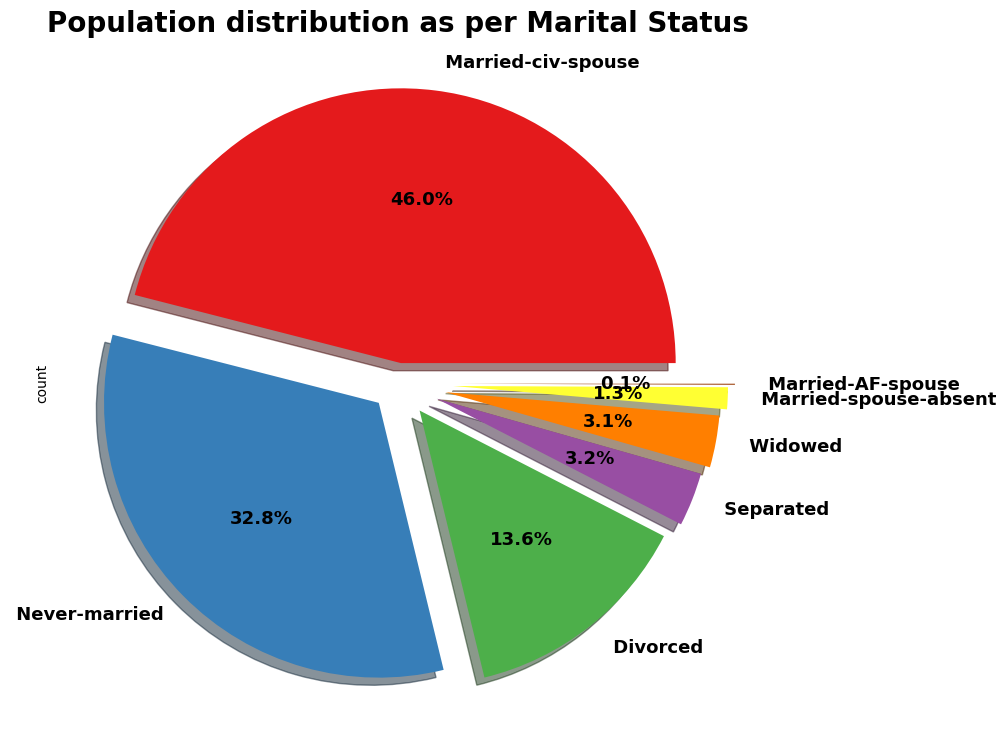

In [32]:
# Set autolayout to True
plt.rcParams["figure.autolayout"] = True

# Set the palette
sns.set_palette('Set1')

# Create the figure
plt.figure(figsize=(10, 10))

# Plot the pie chart
df['Marital_status'].value_counts().plot.pie(
    autopct='%2.1f%%', 
    explode=[0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225],
    textprops={'fontsize': 13, 'fontweight': 'bold'}, 
    shadow=True
)

# Set the title
plt.title('Population distribution as per Marital Status', fontsize=20, fontweight='bold')

# Show the plot
plt.show()


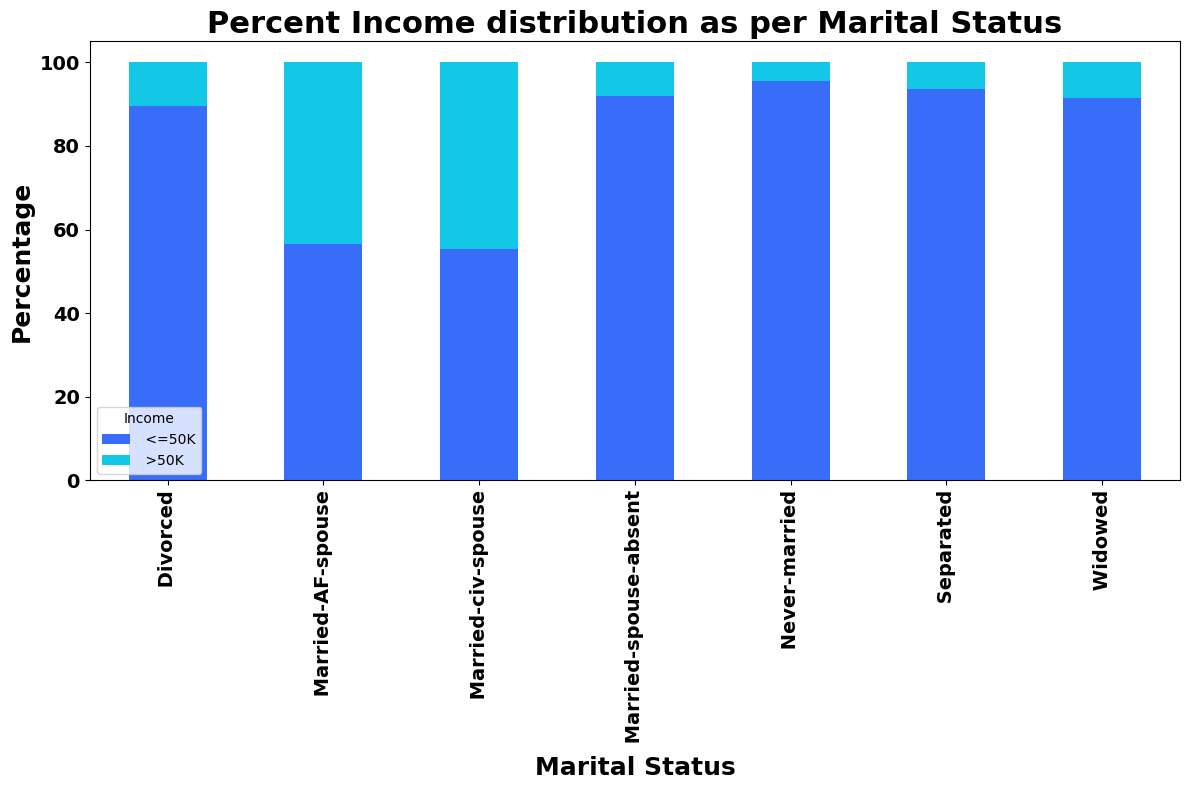

In [33]:
# Set the Seaborn palette
sns.set_palette('rainbow')

# Create a cross-tabulation of Marital Status and Income
table = pd.crosstab(df['Marital_status'], df['Income'])

# Calculate the percentage distribution and plot
percentage_distribution = (table.div(table.sum(axis=1), axis=0) * 100)
percentage_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))

# Set the title and labels with appropriate font sizes and weights
plt.title('Percent Income distribution as per Marital Status', fontsize=22, fontweight='bold')
plt.xlabel('Marital Status', fontsize=18, fontweight='bold')
plt.ylabel('Percentage', fontsize=18, fontweight='bold')

# Customize the x and y ticks
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

# Show the plot
plt.show()


In [34]:
pd.crosstab(df['Marital_status'],df["Income"], margins=True).style.background_gradient(cmap='summer_r')


Income,<=50K,>50K,All
Marital_status,,,
Divorced,3978,463,4441
Married-AF-spouse,13,10,23
Married-civ-spouse,8280,6690,14970
Married-spouse-absent,384,34,418
Never-married,10175,491,10666
Separated,959,66,1025
Widowed,908,85,993
All,24697,7839,32536


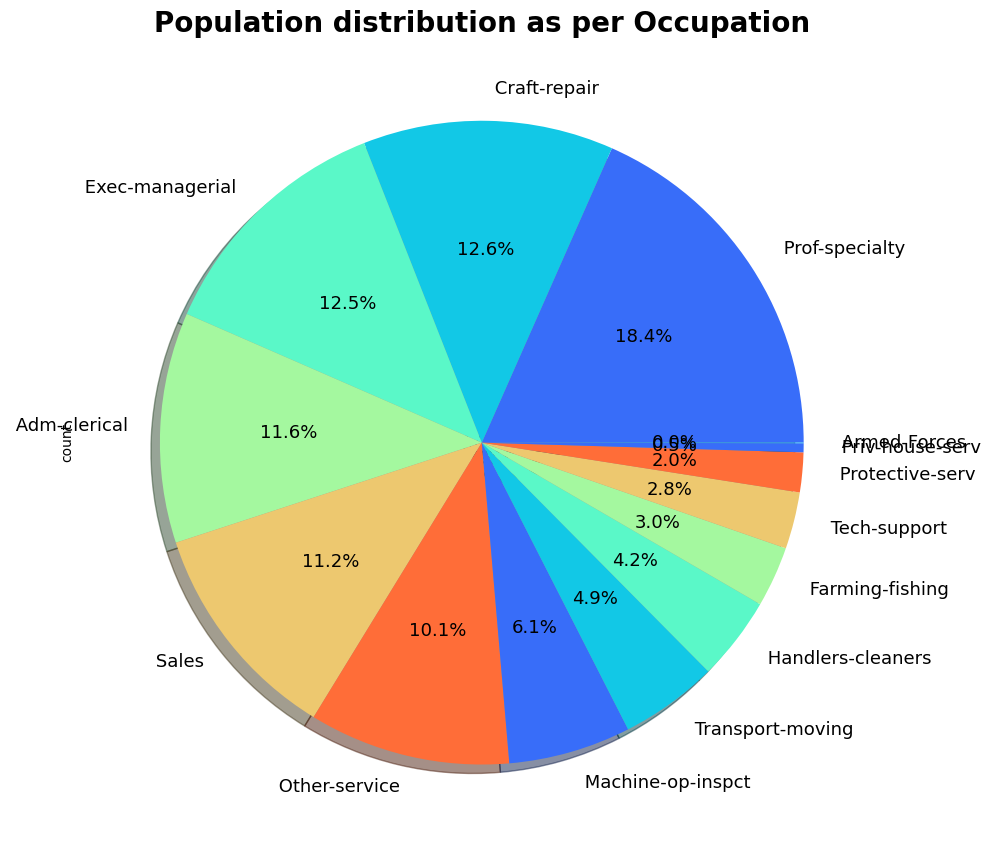

In [35]:
plt.rcParams["figure.autolayout"] = True

# Set the Seaborn palette
sns.set_palette('rainbow')

# Create the figure
plt.figure(figsize=(10, 10))

# Plot the pie chart
df['Occupation'].value_counts().plot.pie(
    autopct='%2.1f%%', 
    textprops={'fontsize': 13}, 
    shadow=True
)

# Set the title
plt.title('Population distribution as per Occupation', fontsize=20, fontweight='bold')

# Show the plot
plt.show()

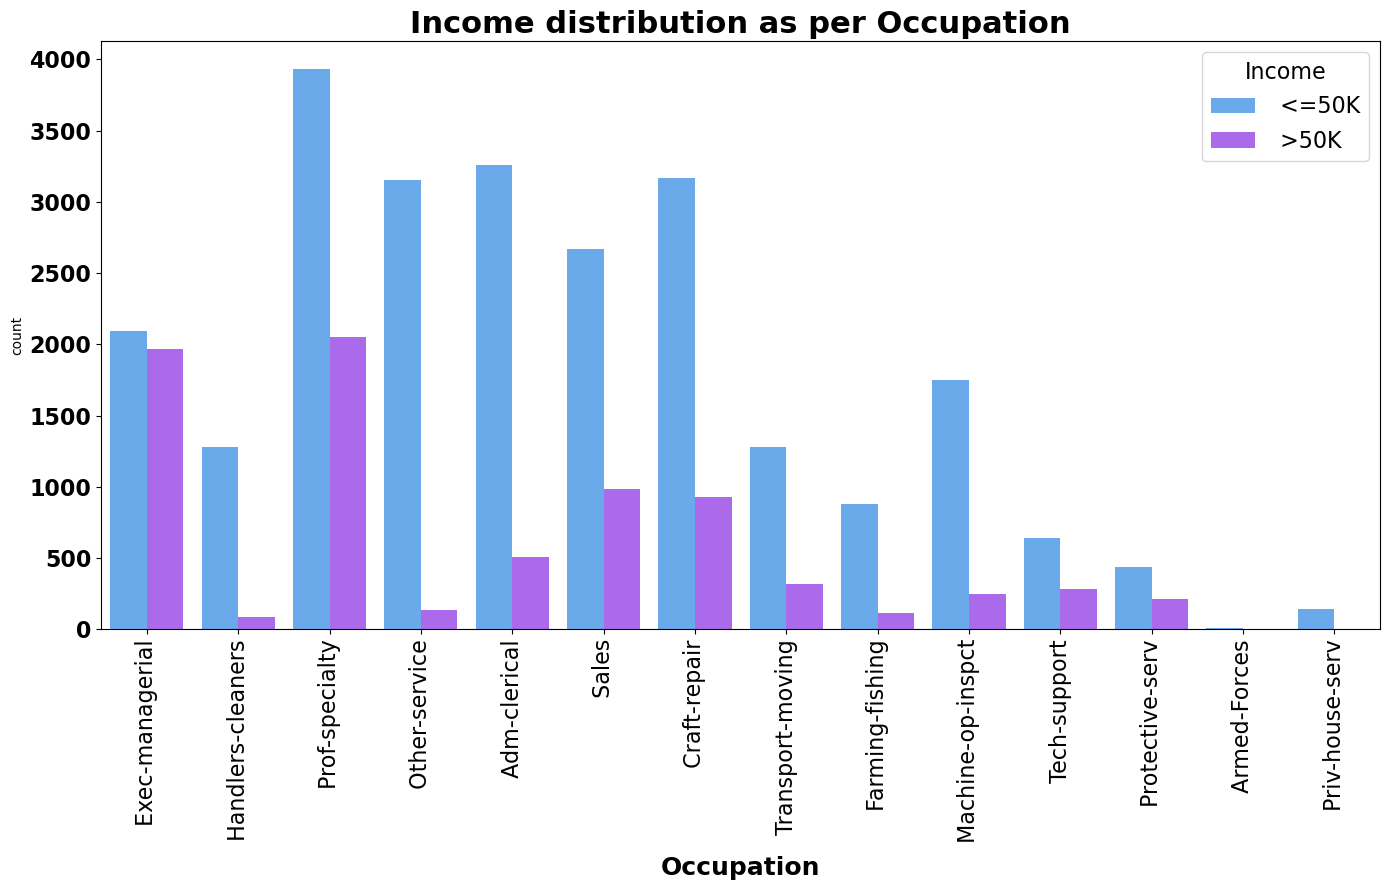

In [36]:
plt.figure(figsize=(14, 9))

# Create the count plot
p = sns.countplot(x='Occupation', hue='Income', data=df, palette='cool')

# Set the title and labels
plt.title('Income distribution as per Occupation', fontsize=22, fontweight='bold')
p.set_xlabel('Occupation', fontsize=18, fontweight='bold')

# Customize the x and y ticks
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16, fontweight='bold')

# Customize the legend
plt.legend(title='Income', fontsize=16, title_fontsize=16)

# Show the plot
plt.show()

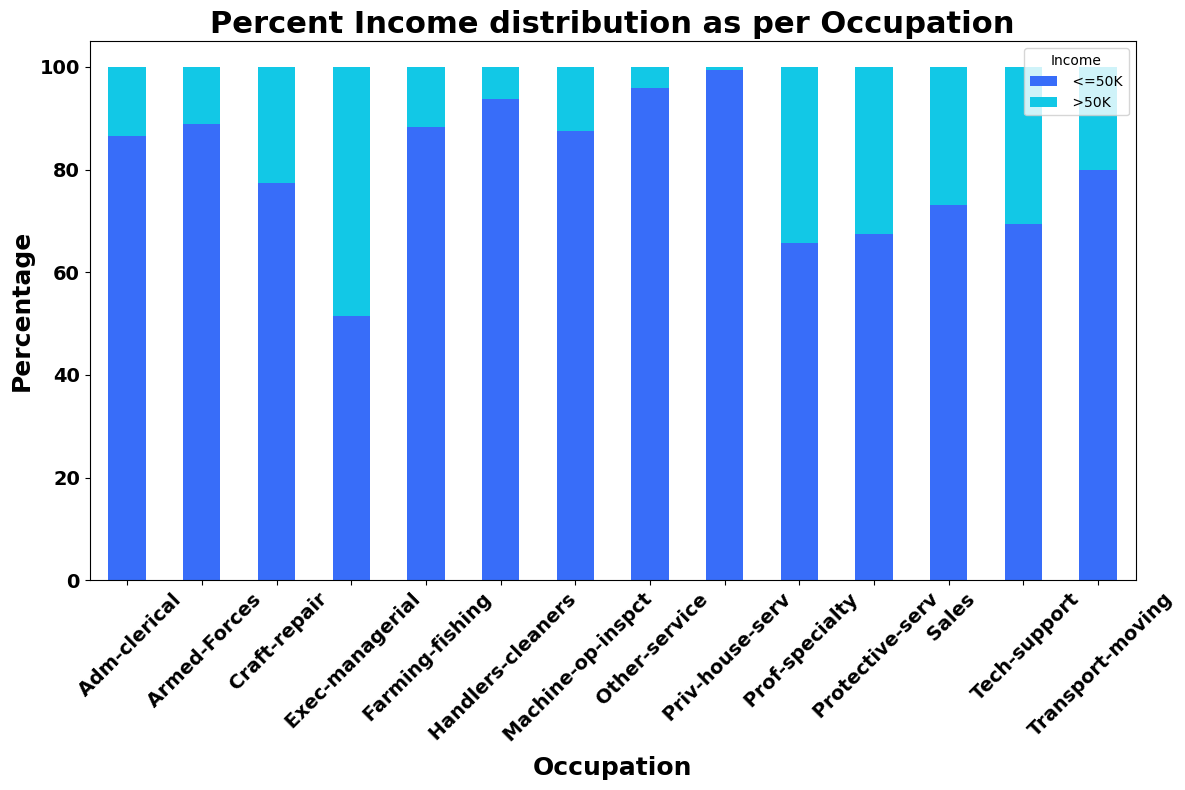

In [37]:
table = pd.crosstab(df['Occupation'], df['Income'])

# Calculate the percentage distribution and plot
percentage_distribution = (table.div(table.sum(axis=1), axis=0) * 100)
percentage_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))

# Set the title and labels with appropriate font sizes and weights
plt.title('Percent Income distribution as per Occupation', fontsize=22, fontweight='bold')
plt.xlabel('Occupation', fontsize=18, fontweight='bold')
plt.ylabel('Percentage', fontsize=18, fontweight='bold')

# Customize the x and y ticks
plt.xticks(fontsize=14, fontweight='bold', rotation=45)  # Adjust rotation for better readability
plt.yticks(fontsize=14, fontweight='bold')

# Show the plot
plt.show()


In [38]:
pd.crosstab(df['Occupation'],df["Income"], margins=True).style.background_gradient(cmap='winter_r')


Income,<=50K,>50K,All
Occupation,,,
Adm-clerical,3260,507,3767
Armed-Forces,8,1,9
Craft-repair,3165,929,4094
Exec-managerial,2097,1968,4065
Farming-fishing,877,115,992
Handlers-cleaners,1283,86,1369
Machine-op-inspct,1751,249,2000
Other-service,3154,137,3291
Priv-house-serv,146,1,147


In [39]:
pd.crosstab(df['Occupation'],df["Workclass"], margins=True).style.background_gradient(cmap='winter_r')


Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Occupation,,,,,,,,,
Adm-clerical,317,283,0,2831,31,50,252,3,3767
Armed-Forces,9,0,0,0,0,0,0,0,9
Craft-repair,64,146,0,3191,106,530,56,1,4094
Exec-managerial,180,214,0,2690,400,392,189,0,4065
Farming-fishing,8,29,0,453,51,430,15,6,992
Handlers-cleaners,23,47,0,1272,2,15,9,1,1369
Machine-op-inspct,14,12,0,1911,13,36,13,1,2000
Other-service,35,193,0,2736,27,175,124,1,3291
Priv-house-serv,0,0,0,147,0,0,0,0,147


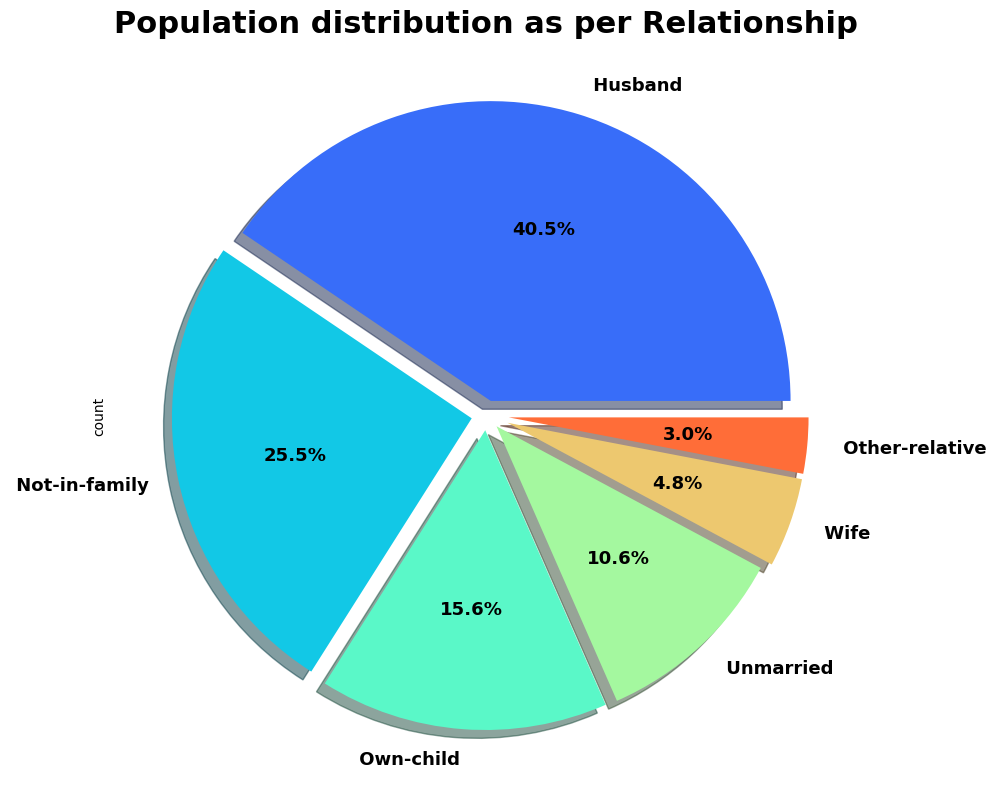

In [40]:
plt.figure(figsize=(10, 10))

# Plot the pie chart
df['Relationship'].value_counts().plot.pie(
    autopct='%2.1f%%', 
    explode=[0.05, 0.05, 0.05, 0.05, 0.075, 0.075],  # Adjust explode values for emphasis
    textprops={'fontweight': 'bold', 'fontsize': 13}, 
    shadow=True
)

# Set the title
plt.title('Population distribution as per Relationship', fontsize=22, fontweight='bold')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

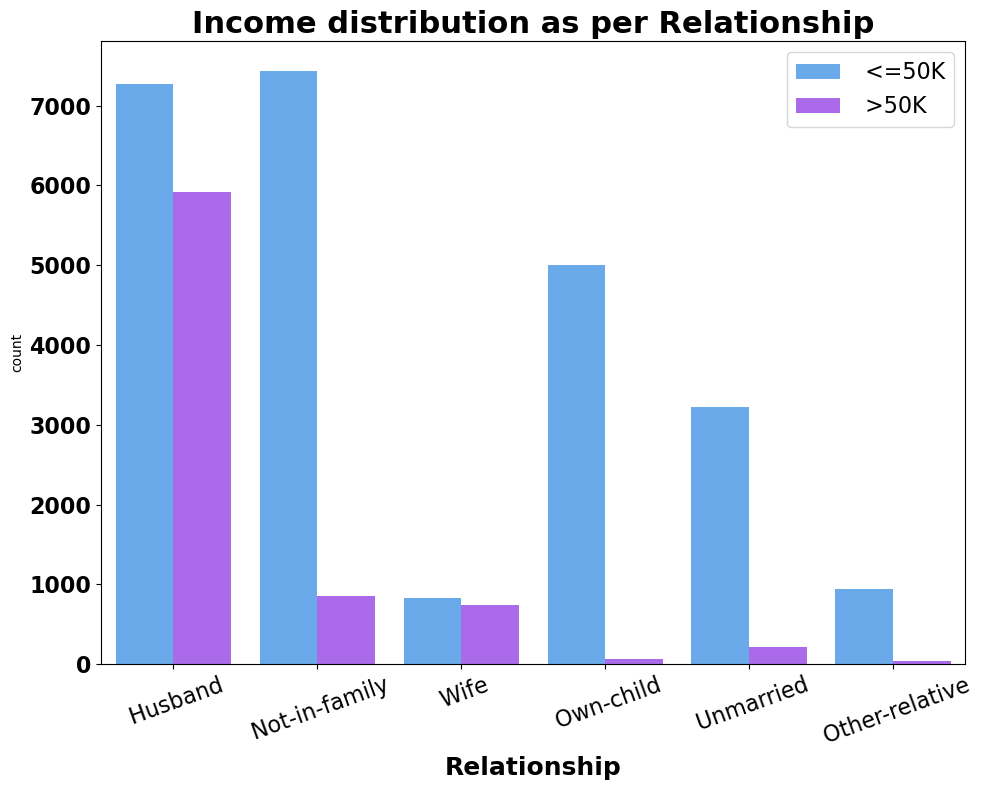

In [41]:
plt.figure(figsize=(10, 8))

# Create the count plot
p = sns.countplot(x='Relationship', hue='Income', data=df, palette='cool')

# Set the title and labels
plt.title('Income distribution as per Relationship', fontsize=22, fontweight='bold')
p.set_xlabel('Relationship', fontsize=18, fontweight='bold')

# Customize the x and y ticks
plt.xticks(fontsize=16, rotation=20)
plt.yticks(fontsize=16, fontweight='bold')

# Customize the legend
plt.legend(fontsize=16)

# Show the plot
plt.show()

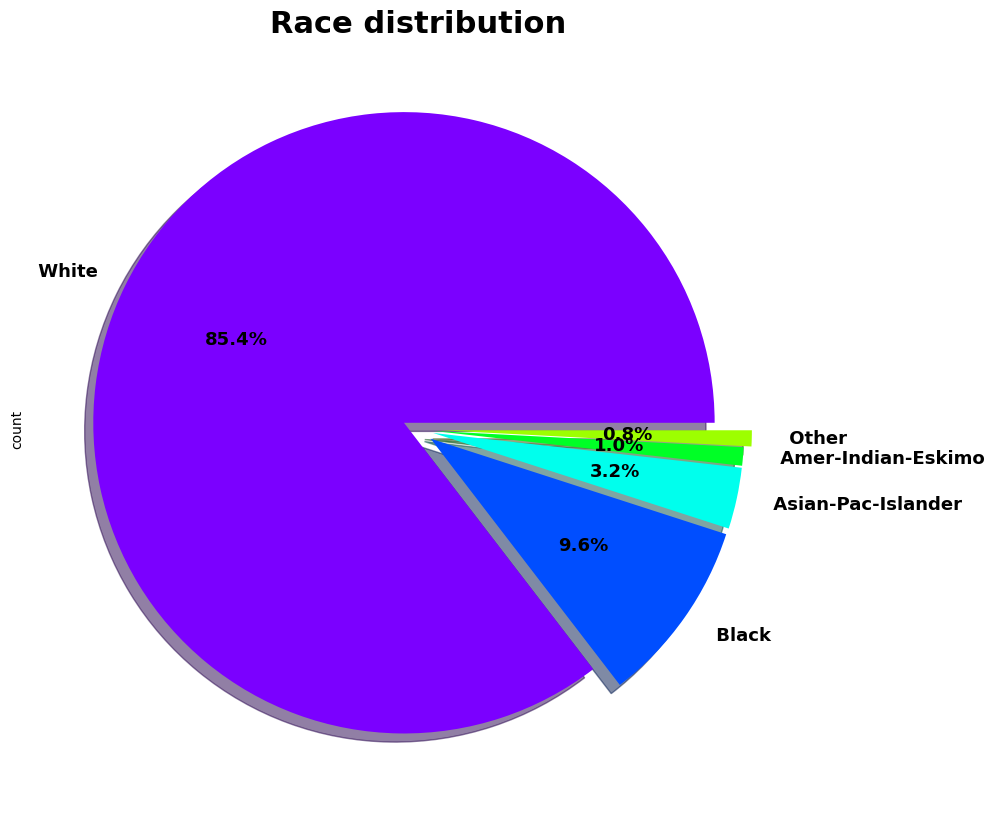

In [42]:


# Set autolayout to True
plt.rcParams["figure.autolayout"] = True

# Set the Seaborn palette
sns.set_palette('gist_rainbow_r')

# Create the figure
plt.figure(figsize=(10, 10))

# Plot the pie chart
df['Race'].value_counts().plot.pie(
    autopct='%2.1f%%', 
    explode=[0.05, 0.05, 0.05, 0.05, 0.075],  # Adjust explode values for emphasis
    textprops={'fontweight': 'bold', 'fontsize': 13}, 
    shadow=True
)

# Set the title
plt.title('Race distribution', fontsize=22, fontweight='bold')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


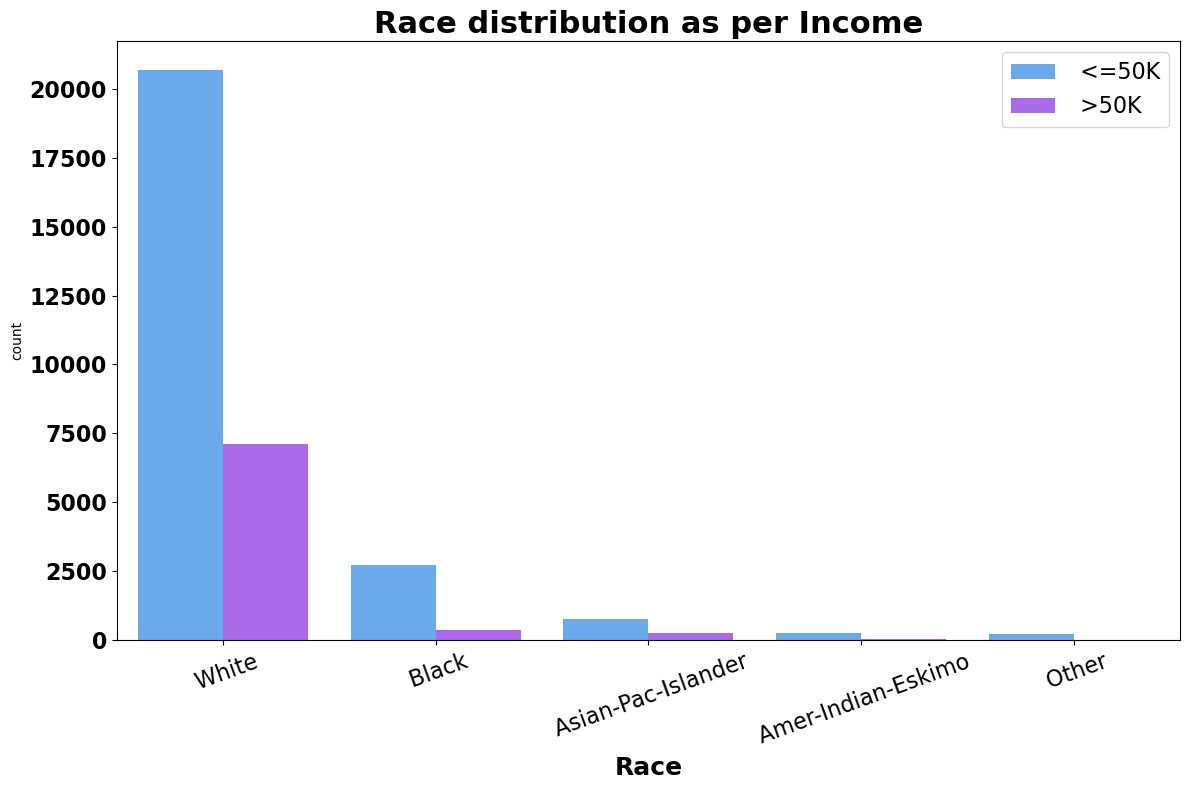

In [43]:


# Create the figure
plt.figure(figsize=(12, 8))

# Create the count plot
p = sns.countplot(x='Race', hue='Income', data=df, palette='cool')

# Set the title and labels
plt.title('Race distribution as per Income', fontsize=22, fontweight='bold')
p.set_xlabel('Race', fontsize=18, fontweight='bold')

# Customize the x and y ticks
plt.xticks(fontsize=16, rotation=20)
plt.yticks(fontsize=16, fontweight='bold')

# Customize the legend
plt.legend(fontsize=16)

# Show the plot
plt.show()


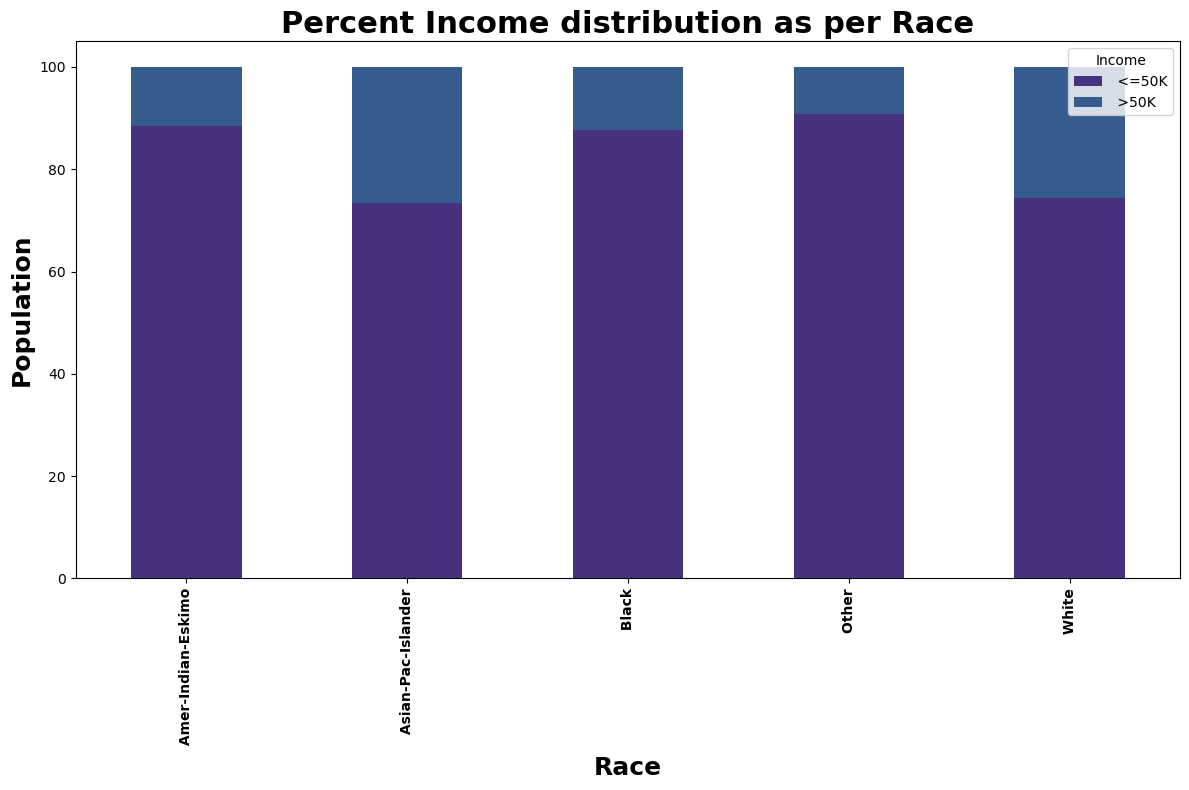

In [44]:
# Set the Seaborn palette
sns.set_palette('viridis')

# Create the crosstab table
table = pd.crosstab(df['Race'], df['Income'])

# Calculate percentage distribution
percentage_table = (table.div(table.sum(axis=1), axis=0) * 100)

# Plot the stacked bar chart
percentage_table.plot(kind='bar', stacked=True, figsize=(12, 8))

# Set the title and labels
plt.title('Percent Income distribution as per Race', fontsize=22, fontweight='bold')
plt.xlabel('Race', fontsize=18, fontweight='bold')
plt.ylabel('Population', fontsize=18, fontweight='bold')

# Customize x-axis tick labels
plt.xticks(fontweight='bold')

# Show the plot
plt.show()


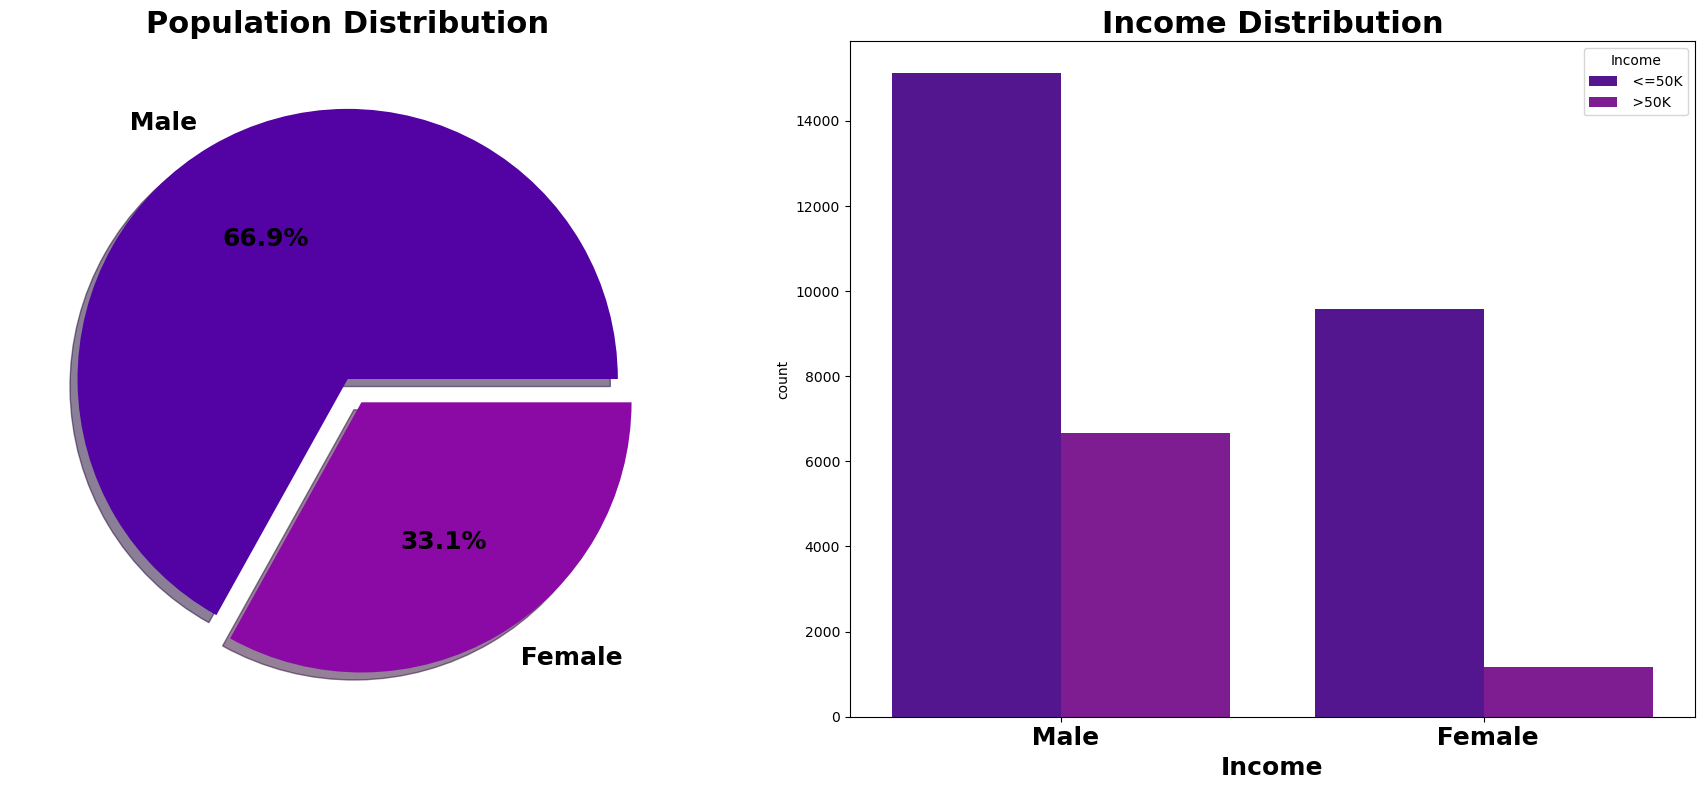

In [45]:
# Set the Seaborn palette
sns.set_palette('plasma')

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Plot pie chart on the first subplot
df['Sex'].value_counts().plot.pie(
    explode=[0, 0.1], 
    autopct='%3.1f%%',
    textprops={'fontweight': 'bold', 'fontsize': 18}, 
    ax=ax[0], 
    shadow=True
)
ax[0].set_title('Population Distribution', fontsize=22, fontweight='bold')
ax[0].set_ylabel('')

# Plot count plot on the second subplot
sns.countplot(x='Sex', hue='Income', data=df, ax=ax[1])
ax[1].set_title('Income Distribution', fontsize=22, fontweight='bold')
ax[1].set_xlabel("Income", fontsize=18, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')

# Show the plots
plt.show()


In [46]:
pd.crosstab(df['Occupation'],[df.Sex,df.Income], margins=True)

Sex                 Female         Male          All
Income               <=50K  >50K  <=50K  >50K       
Occupation                                          
 Adm-clerical         2323   212    937   295   3767
 Armed-Forces            0     0      8     1      9
 Craft-repair          202    20   2963   909   4094
 Exec-managerial       879   280   1218  1688   4065
 Farming-fishing        63     2    814   113    992
 Handlers-cleaners     160     4   1123    82   1369
 Machine-op-inspct     529    20   1222   229   2000
 Other-service        1748    51   1406    86   3291
 Priv-house-serv       138     1      8     0    147
 Prof-specialty       1917   437   2013  1612   5979
 Protective-serv        66    10    372   201    649
 Sales                1175    88   1492   895   3650
 Tech-support          302    45    342   238    927
 Transport-moving       81     9   1196   311   1597
All                   9583  1179  15114  6660  32536

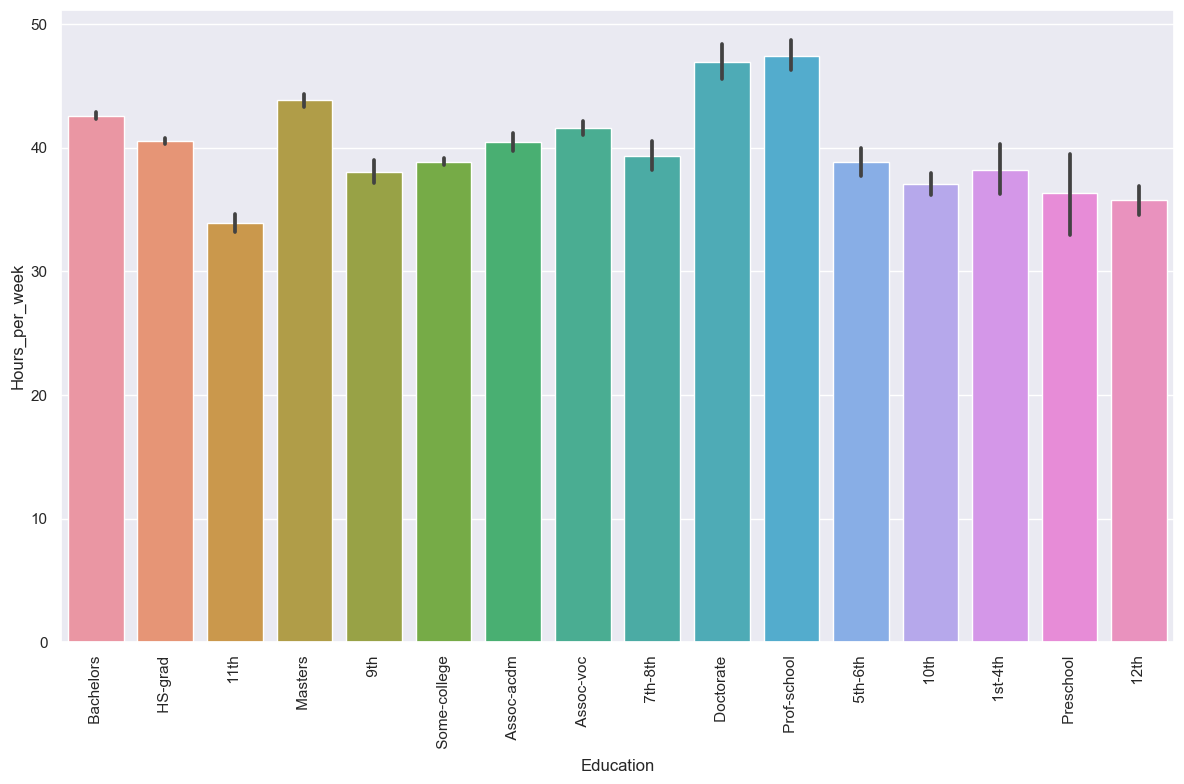

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for all plots
sns.set(rc={'figure.figsize': (12, 8)})

# Create the bar plot
sns_grad = sns.barplot(x='Education', y='Hours_per_week', data=df)

# Rotate x-axis labels for better readability
plt.setp(sns_grad.get_xticklabels(), rotation=90)

# Show the plot
plt.show()


In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,age_group
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0,41-50
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,31-40
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0,51-60
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0,19-30
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0,31-40


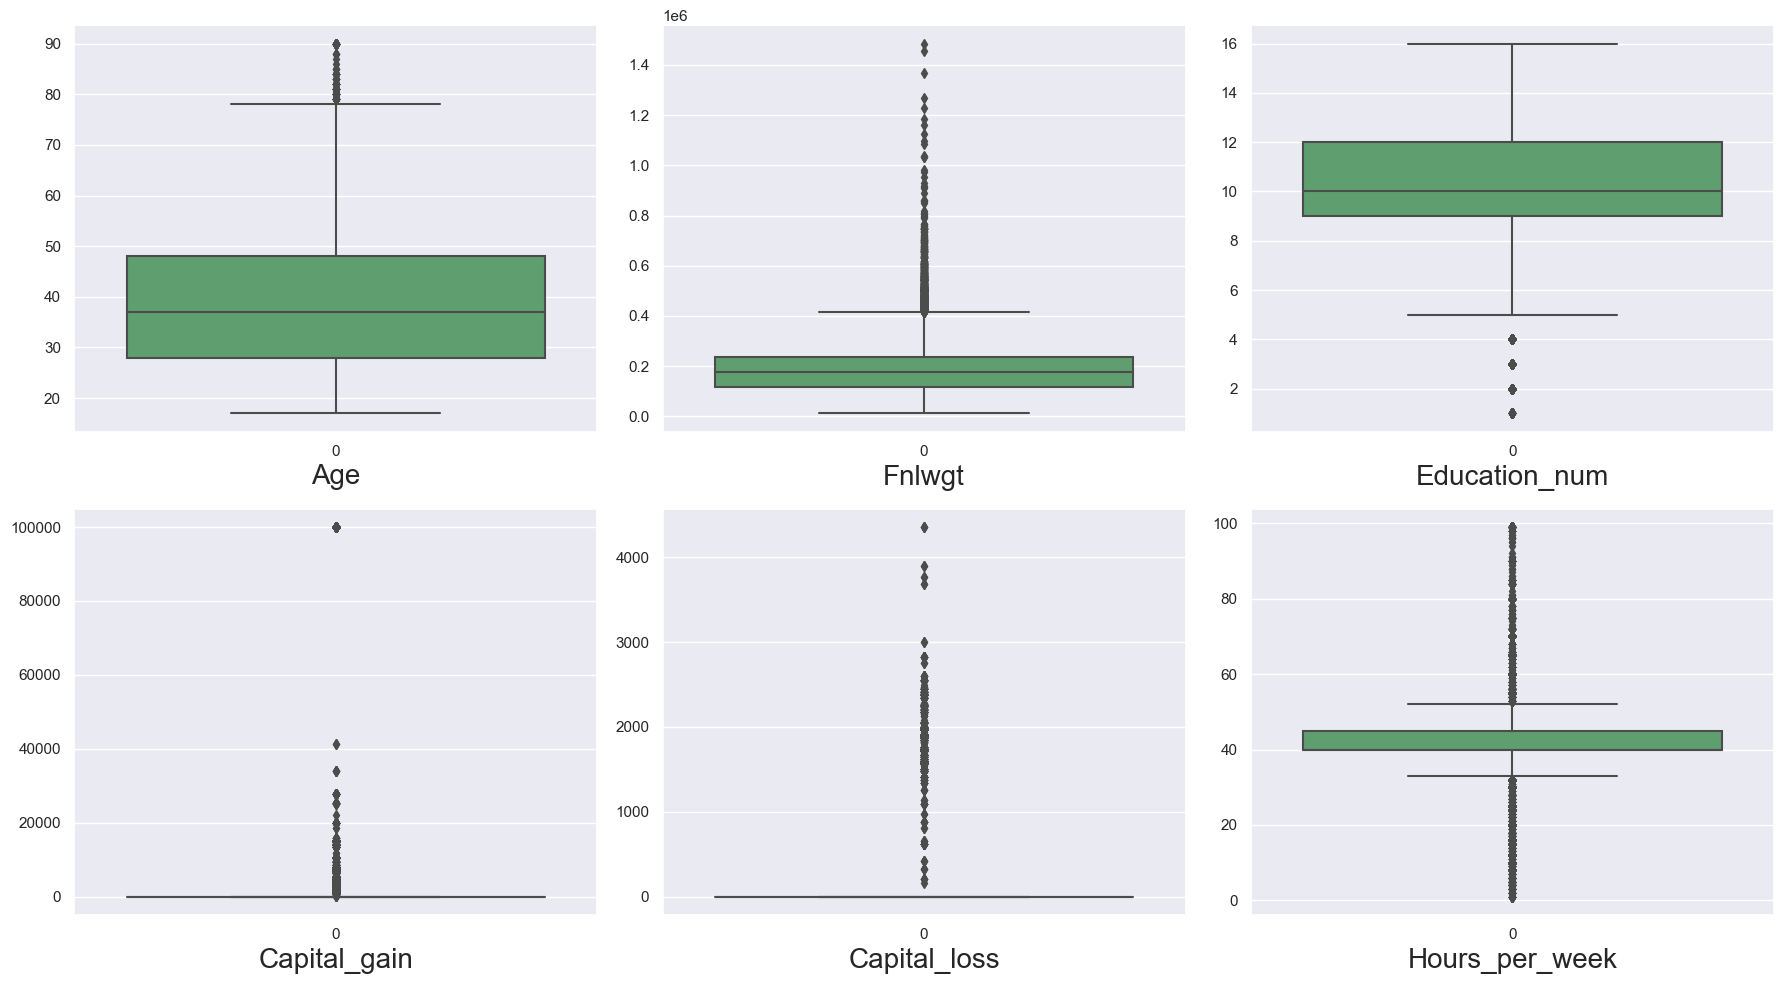

In [49]:
# Ensure that 'Numerical' is defined and contains the correct column names
# For example: Numerical = ['Column1', 'Column2', 'Column3', ...]

# Create a figure with specific size and background color
plt.figure(figsize=(18,10), facecolor='white')

# Initialize plot number
plotnumber = 1

# Loop through the numerical columns
for column in Numerical:
    if plotnumber <= 6:
        # Create a subplot in a 2x3 grid
        ax = plt.subplot(2, 3, plotnumber)
        
        # Generate a boxplot for the column
        sns.boxplot(df[column], color='g')
        
        # Set the x-axis label
        plt.xlabel(column, fontsize=20)
    
    # Increment plot number
    plotnumber += 1

# Show the plots
plt.show()


In [50]:
# Droping unnecessary columns
df.drop(["Fnlwgt", "Education"], axis=1, inplace=True)

In [51]:

from scipy.stats import zscore

# Example DataFrame
# df = pd.read_csv('your_data.csv') # Use this if loading data from a file

# Calculate Z-scores
z = np.abs(zscore(df.select_dtypes(include=[np.number])))  # Use only numerical columns for Z-score

# Define threshold for outlier detection
threshold = 3

# Remove outliers
df1 = df[(z < threshold).all(axis=1)]

# Print statistics
print("Shape of the dataframe before removing outliers: ", df.shape)
print("Shape of the dataframe after removing outliers: ", df1.shape)
print("Percentage of data loss post outlier removal: ", (df.shape[0] - df1.shape[0]) / df.shape[0] * 100)


Shape of the dataframe before removing outliers:  (32536, 14)
Shape of the dataframe after removing outliers:  (28061, 14)
Percentage of data loss post outlier removal:  13.753995574133269


In [52]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((32536-28061)/32536)*100,'%')

Percentage Data Loss : 13.753995574133269 %


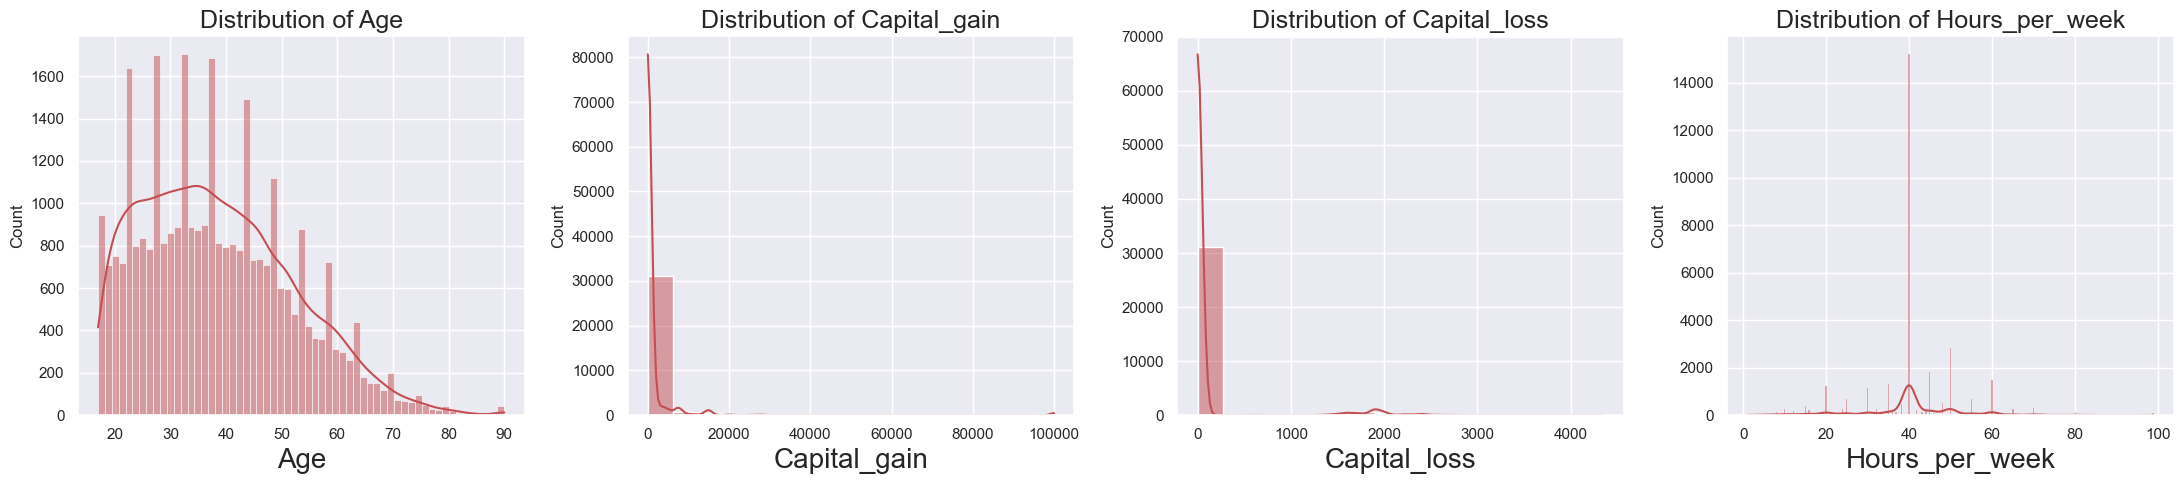

In [53]:
# Ensure the figure size and background color
plt.figure(figsize=(22, 5), facecolor='white')

# Initialize plot number
plotnum = 1

# List of columns to plot
columns = ['Age', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

# Loop through the columns to create histograms
for col in columns:
    if plotnum <= len(columns):
        plt.subplot(1, len(columns), plotnum)  # Adjust subplot grid to match number of columns
        sns.histplot(df[col], kde=True, color='r')  # Use sns.histplot instead of sns.distplot
        plt.xlabel(col, fontsize=20)
        plt.title(f'Distribution of {col}', fontsize=18)  # Optional: add a title to each subplot
    plotnum += 1

# Display the plots
plt.tight_layout()
plt.show()


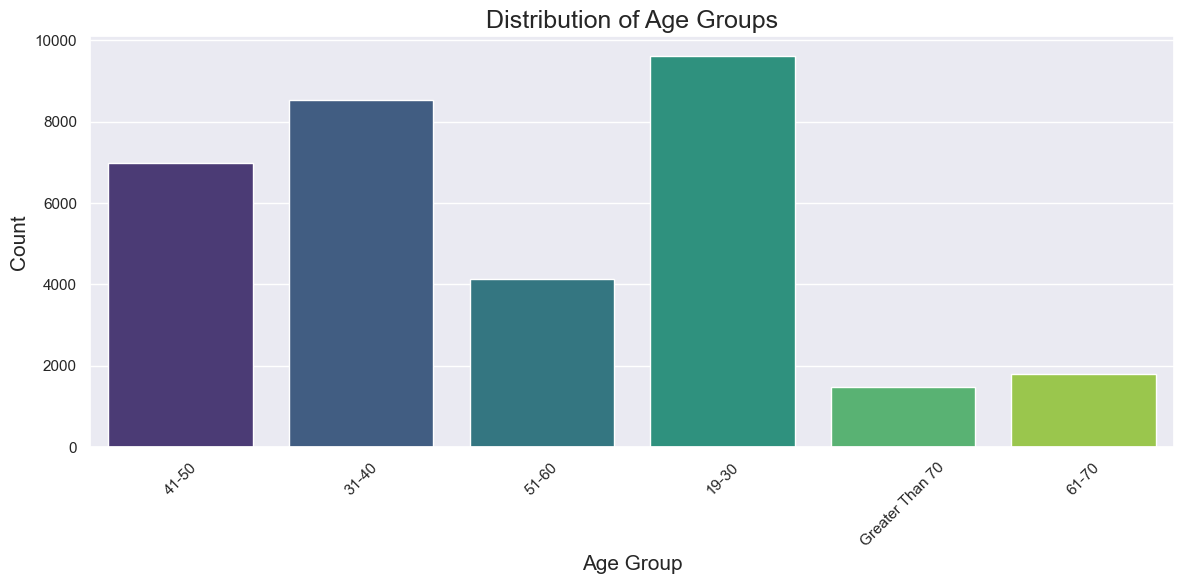

In [54]:
plt.figure(figsize=(12, 6))
sns.countplot(x='age_group', data=df, palette='viridis')
plt.xlabel('Age Group', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Distribution of Age Groups', fontsize=18)
plt.xticks(rotation=45)
plt.show()

In [55]:
df.head()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,age_group
0,50,5,13,2,3,0,4,1,0,0,13,38,0,41-50
1,38,3,9,0,5,1,4,1,0,0,40,38,0,31-40
2,53,3,7,2,5,0,2,1,0,0,40,38,0,51-60
3,28,3,13,2,9,5,2,0,0,0,40,4,0,19-30
4,37,3,14,2,3,5,4,0,0,0,40,38,0,31-40


In [56]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['age_group'] = le.fit_transform(df['age_group'])

In [57]:
df['age_group'] = pd.to_numeric(df['age_group'], errors='coerce')  # Convert to numeric, coercing errors


In [58]:
df.skew()

Age                0.557657
Workclass          0.075983
Education_num     -0.309454
Marital_status    -0.012692
Occupation         0.000407
Relationship       0.786514
Race              -2.435283
Sex               -0.719400
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
Native_country    -4.247065
Income             1.211640
age_group          0.765719
dtype: float64

In [59]:
df.corr()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,age_group
Age,1.000000,0.040463,0.036224,-0.266142,0.001756,-0.263744,0.029116,0.088708,0.077676,0.057745,0.068515,-0.000659,0.234039,0.732738
Workclass,0.040463,1.000000,0.003412,-0.020506,0.007285,-0.057904,0.048322,0.071522,0.031497,0.002661,0.042208,-0.001691,0.002747,0.030067
Education_num,0.036224,0.003412,1.000000,-0.069196,0.070965,-0.094424,0.031998,0.012181,0.122661,0.079901,0.148426,0.088044,0.335299,-0.094376
Marital_status,-0.266142,-0.020506,-0.069196,1.000000,0.034901,0.185542,-0.067942,-0.129425,-0.043373,-0.034134,-0.190433,-0.020892,-0.199187,-0.121762
Occupation,0.001756,0.007285,0.070965,0.034901,1.000000,-0.037443,-0.004789,0.047683,0.018013,0.009644,-0.012851,-0.002124,0.034490,0.039610
Relationship,-0.263744,-0.057904,-0.094424,0.185542,-0.037443,1.000000,-0.116048,-0.582593,-0.057945,-0.061100,-0.248876,-0.010838,-0.250955,-0.130538
Race,0.029116,0.048322,0.031998,-0.067942,-0.004789,-0.116048,1.000000,0.087464,0.011152,0.018916,0.041921,0.116848,0.071855,0.040156
Sex,0.088708,0.071522,0.012181,-0.129425,0.047683,-0.582593,0.087464,1.000000,0.048486,0.045576,0.229190,0.001745,0.215984,0.038361
Capital_gain,0.077676,0.031497,0.122661,-0.043373,0.018013,-0.057945,0.011152,0.048486,1.000000,-0.031638,0.078408,0.008776,0.223340,0.054041
Capital_loss,0.057745,0.002661,0.079901,-0.034134,0.009644,-0.061100,0.018916,0.045576,-0.031638,1.000000,0.054229,0.009337,0.150498,0.039481


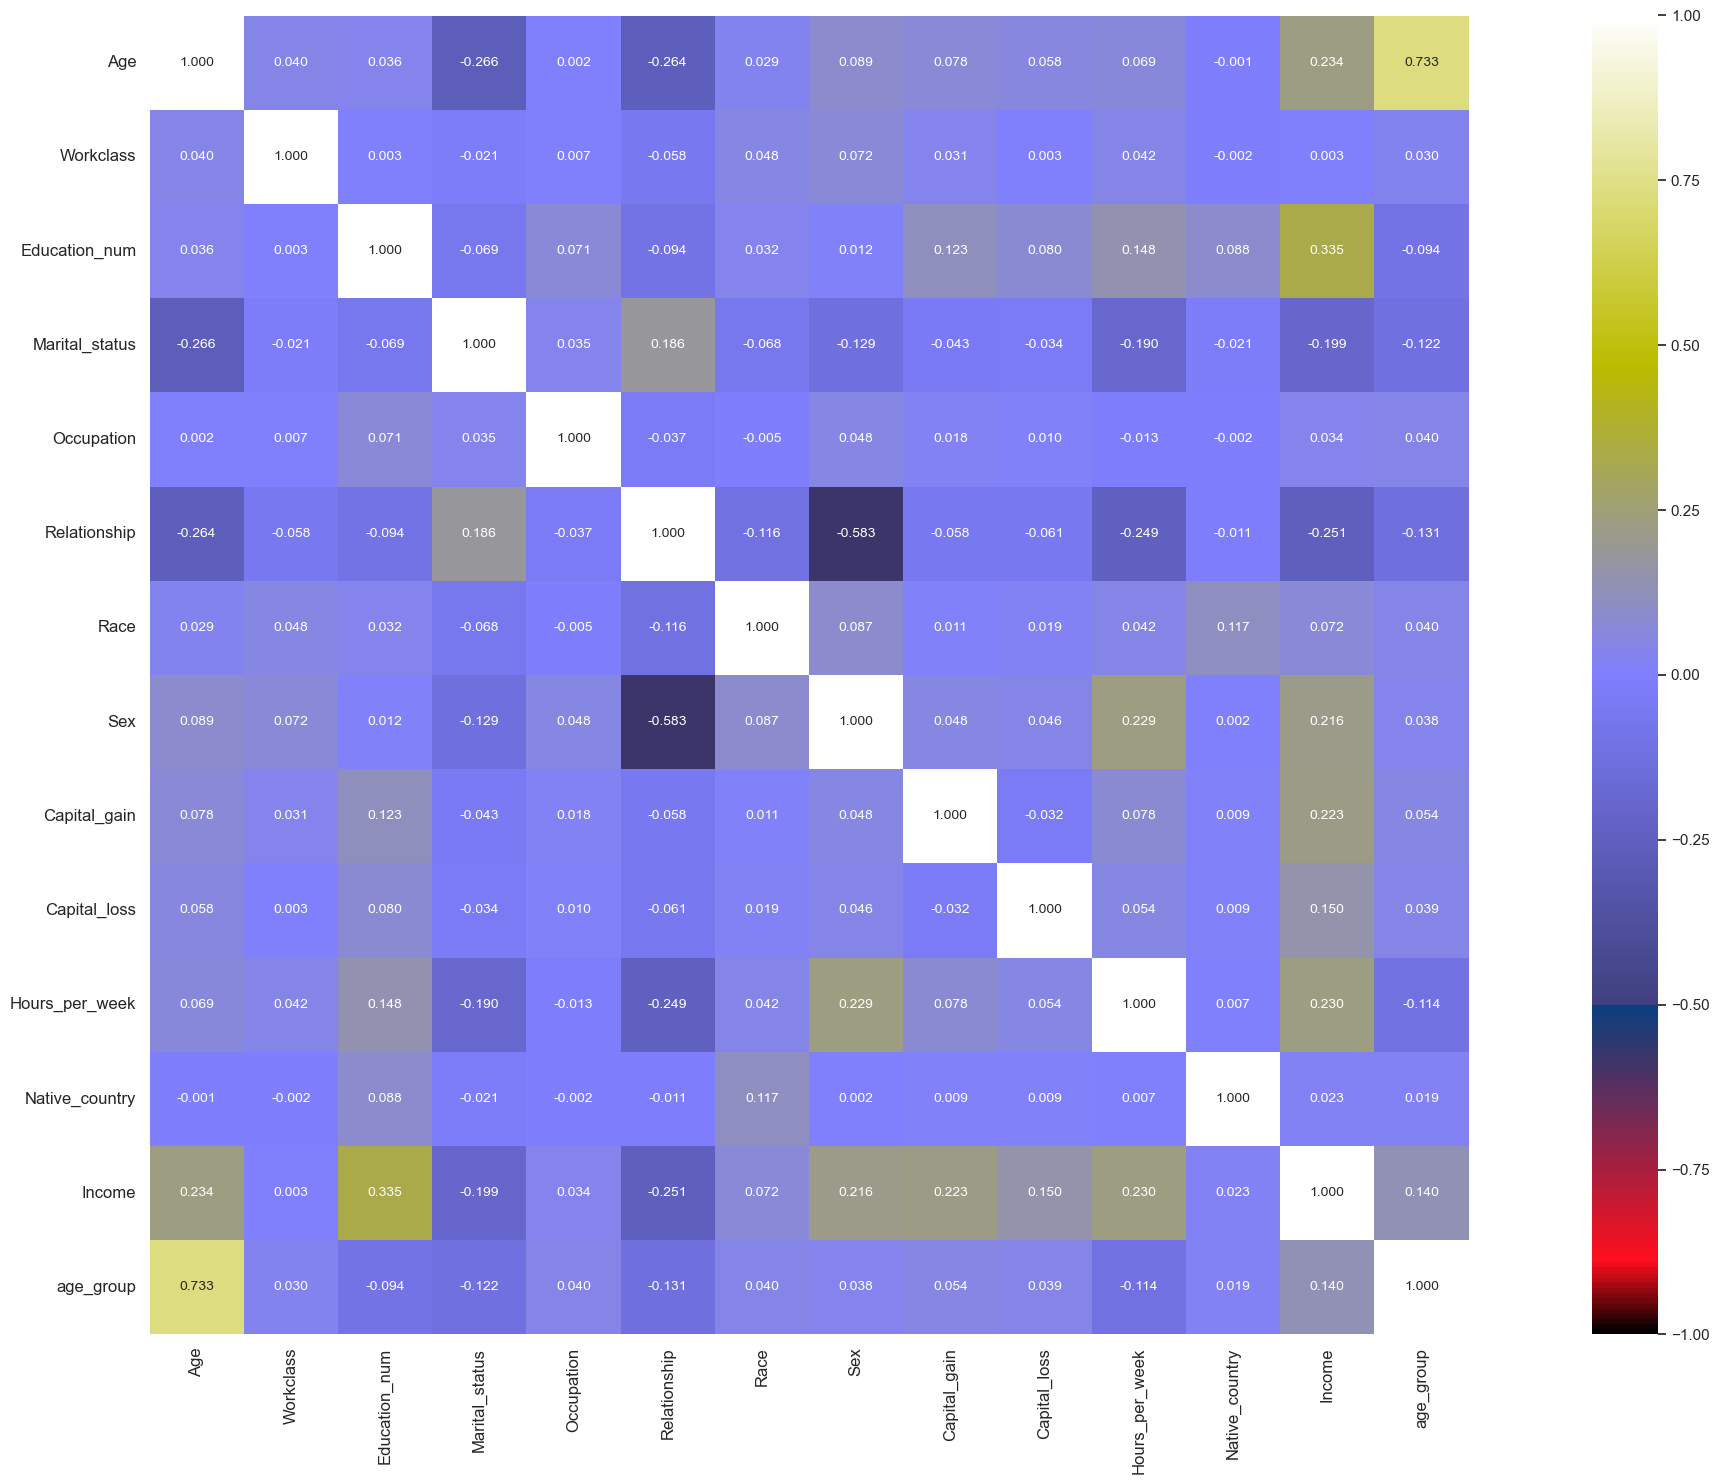

In [60]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

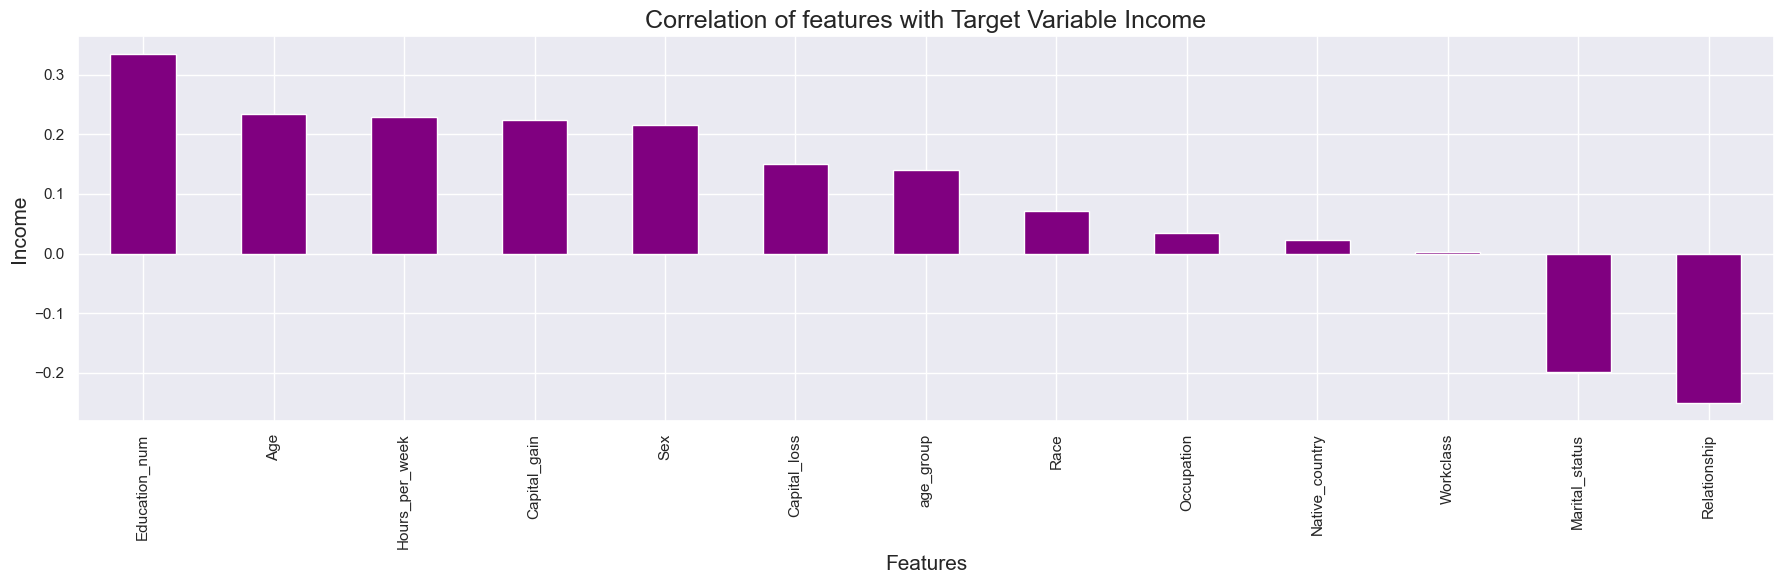

In [61]:
plt.figure(figsize = (18,6))
df.corr()['Income'].drop(['Income']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Income',fontsize = 18)
plt.show()

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,20.302336,Age
1,8.452069,Workclass
2,17.697631,Education_num
3,4.137248,Marital_status
4,3.382719,Occupation
5,2.676670,Relationship
6,17.767465,Race
7,4.489361,Sex
8,1.084566,Capital_gain
9,1.079012,Capital_loss


In [63]:
X = df.drop(['Income'], axis =1)
Y = df['Income']


In [64]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

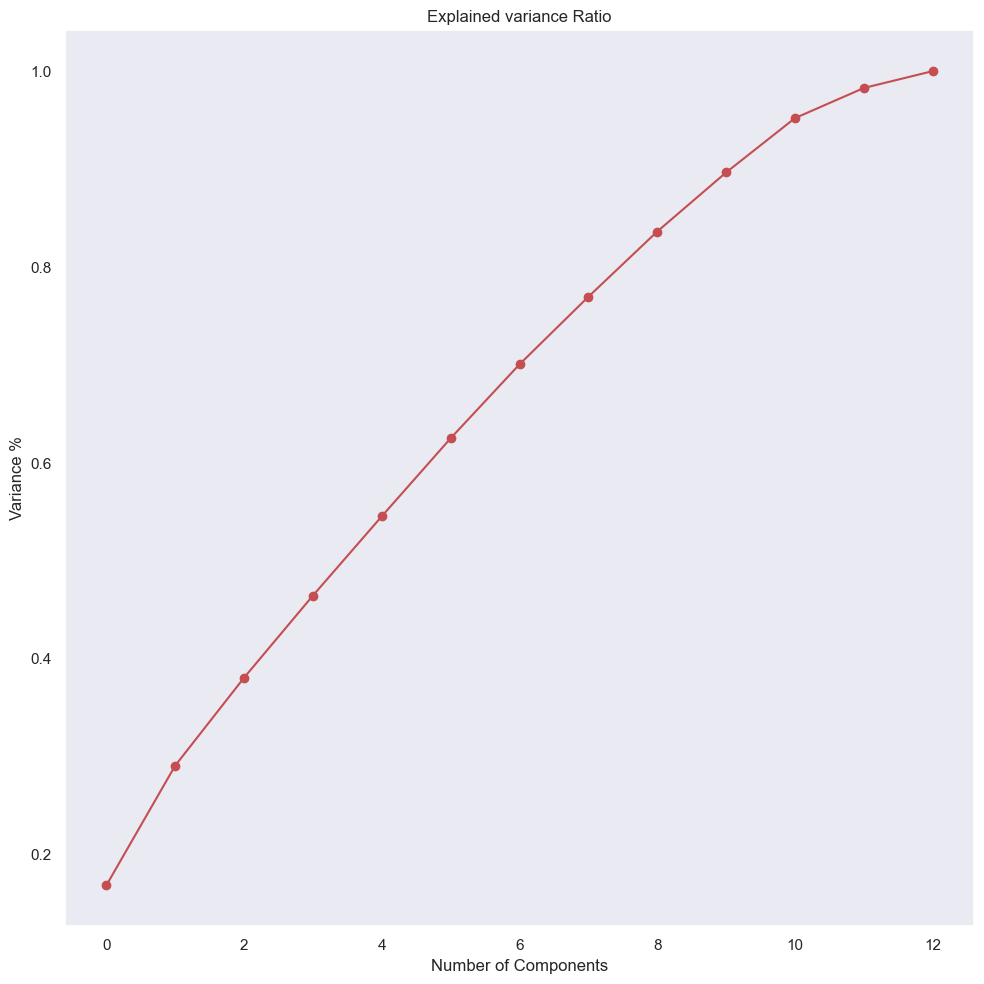

In [65]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score


In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)


Training feature matrix size: (22775, 13)
Training target vector size: (22775,)
Test feature matrix size: (9761, 13)
Test target vector size: (9761,)


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)


Best accuracy is 0.8163098043233276 on Random_state 179


In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=28, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8064747464399139


Confusion matrix of Logistics Regression : 
 [[7048  371]
 [1518  824]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      7419
           1       0.69      0.35      0.47      2342

    accuracy                           0.81      9761
   macro avg       0.76      0.65      0.67      9761
weighted avg       0.79      0.81      0.78      9761



In [71]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(12):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.43192447745642
RMSE value for k=  2 is: 0.4014368211319389
RMSE value for k=  3 is: 0.40105383155090246
RMSE value for k=  4 is: 0.3948754827283569
RMSE value for k=  5 is: 0.40105383155090246
RMSE value for k=  6 is: 0.3953940325022982
RMSE value for k=  7 is: 0.39720362562934003
RMSE value for k=  8 is: 0.3943562510997858
RMSE value for k=  9 is: 0.39617058454173726
RMSE value for k=  10 is: 0.3960412649415751
RMSE value for k=  11 is: 0.3965582903117756
RMSE value for k=  12 is: 0.3951348426792943


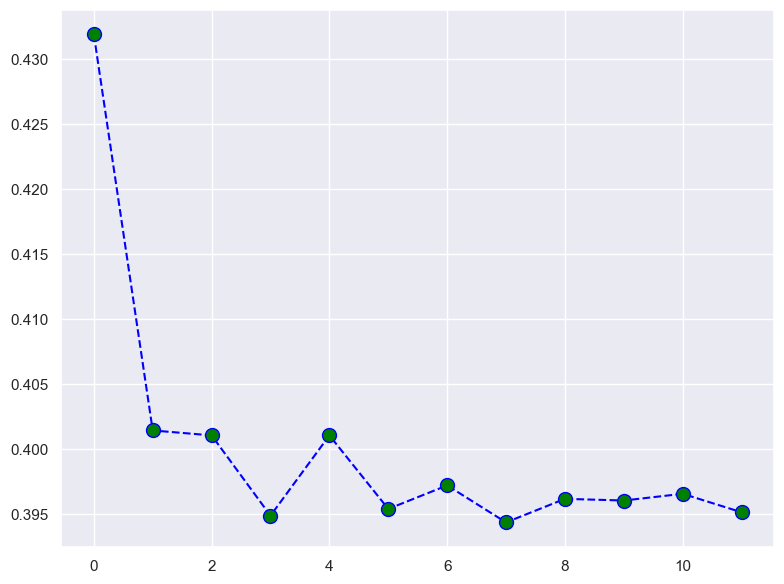

In [72]:
plt.figure(figsize = (8,6))
plt.plot(range(12), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

In [73]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')


Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.8064747464399139


Confusion matrix : 
 [[7048  371]
 [1518  824]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      7419
           1       0.69      0.35      0.47      2342

    accuracy                           0.81      9761
   macro avg       0.76      0.65      0.67      9761
weighted avg       0.79      0.81      0.78      9761



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8032988423317283


Confusion matrix : 
 [[7211  208]
 [1712  630]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      7419
           1       0.75      0.27      0.40      2342

    accuracy                           0.80      9761
   macro avg       0.78      0.62      0.64      9761
weighted avg       0.79      0.80      0

In [75]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')




Cross Validation Score LogisticRegression() :

Score : [0.8057775  0.80682342 0.80528661 0.80497925 0.81481481]
Mean Score : 0.8075363215766218
Std deviation : 0.0036926388861124866




Cross Validation Score SVC() :

Score : [0.80301168 0.80205932 0.802213   0.79944675 0.80451821]
Mean Score : 0.8022497921721857
Std deviation : 0.0016505074914336462




Cross Validation Score GaussianNB() :

Score : [0.80208974 0.80374981 0.80451821 0.7974489  0.80928231]
Mean Score : 0.8034177934613274
Std deviation : 0.0038237451603991414




Cross Validation Score DecisionTreeClassifier() :

Score : [0.80885065 0.8102044  0.80943599 0.81712002 0.81788843]
Mean Score : 0.8126998970141276
Std deviation : 0.0039536242395376165




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.8362016  0.83925004 0.83264177 0.83417858 0.83909636]
Mean Score : 0.8362736683080365
Std deviation : 0.0026234191164154577




Cross Validation Score RandomForestClassifier() :

Score : [0.84895513 0

In [76]:
Final_mod = ExtraTreesClassifier(criterion='entropy',n_estimators= 200, max_depth=30 ,min_samples_split= 8)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))


Accuracy Score :
 0.853703513984223
